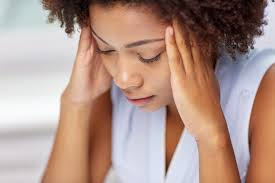
# Prevalence,Attitude to mental health and acceptability to mental health care in 5 countries in Sub-Saharan Africa
# Researcn Questions 
## 1.What is the trend of suicide rate over the years in the 5 countries?
### 1a.What is the trend of suicide rate over the years in the five countries?
### 1b.Can we conclude that suicide rate over the years differ by country?

## 2.What is the average suicide rate in the countries?

## 3.What is the relationship between suicide rate and mental health disorders in the 5 countries?
### 3a.Can we conclude that there is a relationship between suicide rate prevalence and the prevalence of depression across the 5 countries ?
### 3b. Can we conclude that there is a relationship between suicide rate  and the prevalence of mental health disorders across the 5 countries?

## 4.Is their any difference between prevalence of mental health disorder between both gender and Countries?

## 5.What is the attitude of individuals towards mental health in the 5 countries?

## 6.What is the level of acceptability to mental health care in the 5 countries?


In [1]:
#importing neccessary libraries
import  warnings
import scipy
import pandas as pd
import pandas as pd
import numpy as np
import dataframe_image as dfi
from scipy.stats import chi2_contingency
warnings.simplefilter('ignore', FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr
from scipy import stats
from statsmodels.stats import weightstats as stests

from sklearn.decomposition import PCA


In [2]:
#importing the data
df= pd.read_excel('mental health for 5 countries.xlsx')#data from our world in data
df_lull=pd.read_excel('lull survey spsss.xlsx')#data from the online survey 

In [3]:
df.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,25-29 years old (%),50-69 years old (%),Age-standardized (%),prevalence of depression in 15-49 years old (%),Prevalence of depression in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
0,Egypt,EGY,1990,0.180821,0.763804,0.146335,4.305094,1.237085,3.167541,0.632597,...,3.747420,4.878075,3.167541,3.830353,2.478780,3.878402,56134000,5.035531,3099.011955,1.427644e+06
1,Egypt,EGY,1991,0.180998,0.764244,0.147094,4.308178,1.244714,3.170596,0.628133,...,3.735788,4.922841,3.170596,3.820763,2.478118,3.885726,57425000,4.928942,3100.216770,1.465344e+06
2,Egypt,EGY,1992,0.181197,0.764702,0.148294,4.309922,1.251383,3.172891,0.624314,...,3.718044,4.956881,3.172891,3.810828,2.474960,3.893836,58667000,4.791672,3100.606938,1.503300e+06
3,Egypt,EGY,1993,0.181397,0.765129,0.149145,4.310367,1.256475,3.177687,0.621338,...,3.713494,4.989523,3.177687,3.805319,2.476270,3.902356,59881000,4.965632,3103.562795,1.543664e+06
4,Egypt,EGY,1994,0.181590,0.765537,0.150091,4.310044,1.262727,3.179417,0.619446,...,3.704987,5.012209,3.179417,3.798327,2.472413,3.909719,61096000,5.067406,3103.610877,1.583547e+06


In [4]:
df.columns

Index(['Entity', 'Code', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)',
       'prevalence of depression in20-24 years old (%)',
       'prevalence of depression in 10-14 years old (%)', 'All ages (%)',
       '70+ years old (%)', '30-34 years old (%)', '15-19 years old (%)',
       '25-29 years old (%)', '50-69 years old (%)', 'Age-standardized (%)',
       'prevalence of depression in 15-49 years old (%)',
       'Prevalence of depression in males (%)', 'Prevalence in females (%)',
       'Population', 'Suicide rate (deaths per 100,000 individuals)',
       'Depressive disorder rates (number suffering per 100,000)',
       'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)'],
      dtype='object')

In [5]:
df_lull.head()

,Is18_years_old,Agegroup,Sex,Countries,participationvoluntary,understand_ican_withdrawinfo,Agree_to_takepart2,Rate_of_mentalwellbeing,Felt_sad_depressedorlonelyinthepast4weeks,mentalwellb_affectedyourpersonalrelationships,...,total_acceptability_of_health_care,level_acceptabilty,attitude2mentalhealth,Score_rate_of_wellbeing,Sc_hrs_sleeping,Ever_diagnosedwithamentalhealthcondition,Ever_seenamentaltherapist,AggrSymptomMentalHealth,presence_and_diagnosis_of_symptoms,symptoms_of_menta_health
0,1,1,1,4,1,1,1,3,3,2,...,4,1,1,0,1,0,0,3,1,1
1,1,2,1,4,1,1,1,5,4,2,...,4,1,1,0,1,0,0,4,1,1
2,1,2,1,3,1,1,1,3,3,2,...,4,1,1,0,1,0,0,2,0,0
3,1,1,0,4,1,1,1,1,2,2,...,4,1,0,1,0,0,0,5,1,1
4,1,2,0,4,1,1,1,5,4,4,...,0,1,1,0,1,0,0,1,0,0


   ## Data Description for the mental health from the world data in 5 countries

| Variable     | Description                                                                                                                                          |
| -----------  | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| Entity/Country | Name of country                                         
                                                                |
| Code     | Code for country                                                                                                         |
| Year          | Year data was collected                                                                                                   |
| Schizophrenia (%)     | Prevalence of Schizophrenia in percentage   |
| Bipolar disorder (%)     | Prevalence of Bipolar disorder in percentage  |
| Eating disorders (%)      | Prevalence of Eating disorders in percentage |
| Anxiety disorders (%)        | Prevalence of Anxiety disorders in percentage |
| Drug use disorders (%)        | Prevalence of Drug use disorders in percentage |
| Depression (%)                | Prevalence of Depression in percentage |
| Alcohol use disorders (%)   | Prevalence of Alcohol use disorders in percentage |
| prevalence of depression in20-24 years old (%)   | Prevalence of depression in 20-24 years in percentage |
| prevalence of depression in 10-14 years old (%)        | Prevalence of depression in 10-14 years in percentage|
| All ages (%)      | Prevalence of depression across all ages in percentage |
| 70+ years old (%)        | Prevalence of depression in 70+ years in percentage |
| 30-34 years old (%)       | Prevalence of depression in 30-34 years in percentage |
| 15-19 years old (%)       | Prevalence of depression in 15-19 yearsin percentage |
| 25-29 years old (%)        | Prevalence of depression in 25-29 years in percentage |
| 50-69 years old (%)       | Prevalence of depression in all ages after consideration of differences in all ages |
|Age-standardized (%)       | Prevalence of Schizophrenia in percentage |
| prevalence of depression in 15-49 years old (%)       | Prevalence of depression in 15-49 years in percentage |
| Population       | Number of people in the country for the given year |
| Prevalence of depression in males (%)   | Prevalence of depression in males in percentage                                                                                                     |
|Prevalence of depression in females (%)     | Prevalence of depression in females  in percentage                                                                                                         |
|Suicide rate (deaths per 100,000 individuals)     | Number of suicide deaths for every 100,000 individuals in the country for the year
                                                      |
| Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)     | Prevalence of depression accross all ages and gender

 The data above was gotten from  [Our world in Data](https://ourworldindata.org/suicide)

In [6]:
df_lull[['Is18_years_old','presence_and_diagnosis_of_symptoms','symptoms_of_menta_health','participationvoluntary','understand_ican_withdrawinfo','Agree_to_takepart2','Ever_diagnosedwithamentalhealthcondition','Family_historyofmentaldisorder','Ever_seenamentaltherapist','Owns_a_smartphone','Used_smartphonetoaccessgeneralhealthinfo','wants_toaccesshealthinformationonsmartphone','Would_udownloadanapptohelpwithmentalwellbeing','Willing_tousephonetomonitorwellbeingdaily','Willingtobeconsultmentalhealthspecialistthroughyourphone']]=df_lull[['Is18_years_old','presence_and_diagnosis_of_symptoms','symptoms_of_menta_health','participationvoluntary','understand_ican_withdrawinfo','Agree_to_takepart2','Ever_diagnosedwithamentalhealthcondition','Family_historyofmentaldisorder','Ever_seenamentaltherapist','Owns_a_smartphone','Used_smartphonetoaccessgeneralhealthinfo','wants_toaccesshealthinformationonsmartphone','Would_udownloadanapptohelpwithmentalwellbeing','Willing_tousephonetomonitorwellbeingdaily','Willingtobeconsultmentalhealthspecialistthroughyourphone']].replace([1,0],['Yes','No'])
df_lull['Sex']=df_lull['Sex'].replace([0,1],['Male','Female'])
df_lull['Countries']=df_lull['Countries'].replace([1,2,3,4,5],['Egypt','Ghana','Kenya','Nigeria','South Africa'])
df_lull['Agegroup']=df_lull['Agegroup'].replace([1,2,3,4,5,6,7],['18-24 years','25-34 years','35-44 years','45-54 years','55-64 years','65-74 years','Above 75 years'])
df_lull['Rate_of_mentalwellbeing']=df_lull['Rate_of_mentalwellbeing'].replace([1,2,3,4,5],['Poor','Fair','Good','Very good','Excellent'])
df_lull[['Felt_sad_depressedorlonelyinthepast4weeks','mentalwellb_affectedyourpersonalrelationships','mentalwellb_interferedwithabilitytogetworkdone']]=df_lull[['Felt_sad_depressedorlonelyinthepast4weeks','mentalwellb_affectedyourpersonalrelationships','mentalwellb_interferedwithabilitytogetworkdone']].replace([1,2,3,4,5],['Extremely Often','Very Often','Somewhat Often','Not so often','Not at all Often'])
df_lull['hours_sleppingperday']=df_lull['hours_sleppingperday'].replace([1,2,3,4],['less than 4 hours','4-6hours','7-9 hours','9 hours and above'])
df_lull['Married_or_not'] = df_lull['Married_or_not'].replace([0,1],['not married','married'] ) 
df_lull['Quality_ofsleep']=df_lull['Quality_ofsleep'].replace([1,2,3,4,5],['Very Bad','Bad','Normal','Good','Very good'])
df_lull['Score_rate_of_wellbeing']=df_lull['Score_rate_of_wellbeing'].replace([0,1],['Positive','Negative'])
df_lull['level_acceptabilty']=df_lull['level_acceptabilty'].replace([0,1],['low','High'])
df_lull[['presence_and_diagnosis_of_symptoms','symptoms_of_menta_health']]=df_lull[['presence_and_diagnosis_of_symptoms','symptoms_of_menta_health']].replace([0,1],['Absent','Present'])
df_lull['Marital_status']=df_lull['Marital_status'].replace([1,2,3,4,5],['Married','Widowed','Divorced','Seperated','Never Married'])
df_lull['Feeling_positive']=df_lull['Feeling_positive'].replace([1,2,3,4,5],['Never','Once in a while','About half the time','Most of the time','Always'])
df_lull.head()

,Is18_years_old,Agegroup,Sex,Countries,participationvoluntary,understand_ican_withdrawinfo,Agree_to_takepart2,Rate_of_mentalwellbeing,Felt_sad_depressedorlonelyinthepast4weeks,mentalwellb_affectedyourpersonalrelationships,...,total_acceptability_of_health_care,level_acceptabilty,attitude2mentalhealth,Score_rate_of_wellbeing,Sc_hrs_sleeping,Ever_diagnosedwithamentalhealthcondition,Ever_seenamentaltherapist,AggrSymptomMentalHealth,presence_and_diagnosis_of_symptoms,symptoms_of_menta_health
0,Yes,18-24 years,Female,Nigeria,Yes,Yes,Yes,Good,Somewhat Often,Very Often,...,4,High,1,Positive,1,No,No,3,Yes,Yes
1,Yes,25-34 years,Female,Nigeria,Yes,Yes,Yes,Excellent,Not so often,Very Often,...,4,High,1,Positive,1,No,No,4,Yes,Yes
2,Yes,25-34 years,Female,Kenya,Yes,Yes,Yes,Good,Somewhat Often,Very Often,...,4,High,1,Positive,1,No,No,2,No,No
3,Yes,18-24 years,Male,Nigeria,Yes,Yes,Yes,Poor,Very Often,Very Often,...,4,High,0,Negative,0,No,No,5,Yes,Yes
4,Yes,25-34 years,Male,Nigeria,Yes,Yes,Yes,Excellent,Not so often,Not so often,...,0,High,1,Positive,1,No,No,1,No,No


In [7]:
#df_lull.to_excel("df lull.xlsx",
             #sheet_name='Detail') 

## Data Description

| Variable | Description    |
| ----------- | ----------------------------------------------------------------------|
| Is18years old |Is the respondent 18 years or older?  |
| Age group     |The Age group the respondents fall into   |
| Sex           |Indicating whether the respondents was male or female. |
|Countries      | Indicating whether the respondents was male or female. |
| participationvoluntary | Does the respondent understand that participation in the survey is                                       voluntary ?                                                        |                                                      | understand_ican_withdrawinfo| Does the respondent understand participation is voluntary, and that they are free to withdraw from the survey at any time, without giving any reason ?    |
| Agree_to_takepart2 | Does the respondent agree to take part in the survey ?  |
| Rate_of_mentalwellbeing	 | Overall, how does the respondent  rate his mental wellbeing ? |
| Felt_sad_depressedorlonelyinthepast4weeks | During the past 4 weeks how often has the respondent felt sad, depressed or lonely?                                             |
| mentalwellb_affectedyourpersonalrelationships | Does the respondent understand that participation in the survey is           voluntary                                           |
| mentalwellb_affectedyourpersonalrelationships| Does the respondent understand that participation in the survey is             voluntary                                                     |
| Family_historyofmentaldisorder |  Is there a history of mental health disorder in the respondents' family?  |
| hours_sleppingperday | How many hours does the respondent sleep per day?|
| Quality_ofsleep | How is the respondents' quality of sleep? |
| Marital_status | What is  the respondent's marital status?|
| mentalwellb_interferedwithabilitytogetworkdone | How has the respondents mental wellbeing interfer 
   ed with his ability to get work done in the past 4 weeks?  |                
| Owns_a_smartphone   | Does the respondents own a smart phone?|
| Internetaccess      | Does the respondents have daily access to internet on smart phone?|                                      | Feeling_positive    | How often does the respondent feel positive about your life? |
| Numberofappsonphone | How many health care related applications or "apps" do you have on your phone?                                                                                              |               
|Used_smartphonetoaccessgeneralhealthinfo|In the last six months, has the respondents used your smartphone to access general health care information?                                              |
| wants_toaccesshealthinformationonsmartphone | Would the respondent want to be able to access helpful general information related to your mental wellbeing via your smart phone?                                                                                                                                  |
| Would_udownloadanapptohelpwithmentalwellbeing |  Would you download an application or "app" to your phone to help you with your mental wellbeing?                              |
| Willing_tousephonetomonitorwellbeingdaily | Would the respondents be willing to use an application or "app" on your phone on a daily basis to help monitor your mental wellbeing?                                                                                                                                               |
| Willingtobeconsultmentalhealthspecialistthroughyourphone | 8. Would the respondents be willing to consult a mental health provider on the application "app"?                                                                                                                                                        |
| Married_or_not | Is the respondents married or not?                                                                                                                                  |
|Sc_felt_sad_depressed | A score of 1 for respondents that have felt sad or depressed very often or extremely often and 0 otherwise                                                                                                                                                     |
| Sc_mental_affect_personal | A score of 1 for respondents whose mental health have affected theor personal relationships very often or extremely often and 0 otherwise                                                                                                                                              |
| Sc_mentalHealth_interfere | A score of 1 for respondents whose mental wellbeing have affected their ability to get work done in the past 4 weeks very often or extremely often and 0 otherwise                                                                                                                              |
| Sc_feel_positive | A score of 1 for respondents who feel positive about their life never  or once in a while and a score of 0 otherwise                                                     |
| Sc_quality_of_sleep | A score of 1 for respondents whose quality of sleep was bad or very bad and a score of 0 otherwise                                                                    |
| total_acceptability_of_health_care | An aggregate score of respondent on willingness to download a health app,access health information with phone,monitor wellbeing with an app and 
consult mental health therapist through a phone                 |
| level_acceptabilty| A score of 1 is given to respondents with atleast 3 yeses in the total_acceptability variable above and score of 0 otherwise                                          |
| Score_rate_of_wellbeing | A score of 1 for respondents whose rate of mental wellbeing was poor or fair and a score of 0 otherwise                                                      |
| Sc_hrs_sleeping |  A score of 1 for respondents whose hrs of sleep were less than 4 hrs or more than 9 hours and a score of 0 otherwise                                                                                                                                                                                  |
| Ever_diagnosedwithamentalhealthcondition  | Has the respondent ever been diagnosed with a mental health disorder before?                                                                                                                                                                                         |
| Ever_seenamentaltherapist| Has the respondent seen a mental health therapist, counsellor, psychiatrist, psychologist? 
                                                    |
| AggrSymptomMentalHealth  | An aggregated score for respondents of each variable for the seven symptoms of mental health wellbeing(Sc_felt_sad_depressed,Sc_quality_of_sleep,Sc_mental_affect_personal,Sc_mentalHealth_interfere,Sc_feel_positive,Score_rate_of_wellbeing,Sc_hrs_sleeping,Ever_diagnosedwithamentalhealthcondition)            
                                     |                                                                                          | presence_and_diagnosis_of_symptoms  | A score of 1(present)is given to respondents with who responded yes with diagnosis of mental health disorder or and had 1(positive) for  symptoms_of_menta_health                                                                                                       |
| symptoms_of_menta_health  | A score of 1(positive)is given to respondents with atleast a score of 5 in the AggrSymptomMentalHealth variable above                                                   |
| attitude2mentalhealth | A score of 1(positive)is given to respondents with a score of 0 in Score_rate_of_wellbeing                                                                                   |                      

More details can be gotten from  [The Lull Data report,written by the '20 Clues Data Professional team'](https://ourworldindata.org/suicide)

In [8]:
df = df.rename(columns={'Entity':'Country'})

In [9]:
df = df.drop(columns=['Code'])
#df['Year'] = pd.to_datetime(df['Year'])


**Cleaning and Feature Engineering**

<AxesSubplot:xlabel='Suicide rate (deaths per 100,000 individuals)', ylabel='Density'>

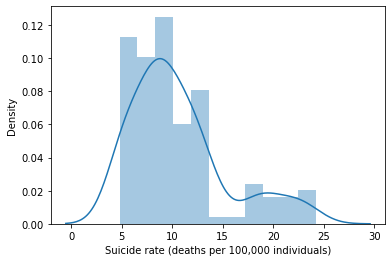

In [10]:
#added cell
#feature engineering of 
#first let us check for outlliers,The population variable is a right skewed distribution
sns.distplot(df['Suicide rate (deaths per 100,000 individuals)'])

In [11]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
       max_value = df[feature_name].max()
       min_value = df[feature_name].min()
       result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [12]:
mental_health_disorder= df[['Schizophrenia (%)','Bipolar disorder (%)','Eating disorders (%)','Anxiety disorders (%)','Drug use disorders (%)','Depression (%)','Alcohol use disorders (%)']]
mental_health_indices=df[['Schizophrenia (%)', 'Bipolar disorder (%)','Eating disorders (%)', 'Anxiety disorders (%)','Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)','prevalence of depression in20-24 years old (%)','prevalence of depression in 10-14 years old (%)', 'All ages (%)','70+ years old (%)', '30-34 years old (%)', '15-19 years old (%)','25-29 years old (%)', '50-69 years old (%)', 'Age-standardized (%)','prevalence of depression in 15-49 years old (%)','Prevalence of depression in males (%)', 'Prevalence in females (%)', 'Suicide rate (deaths per 100,000 individuals)','Depressive disorder rates (number suffering per 100,000)','Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)']]
df

,Country,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),prevalence of depression in20-24 years old (%),...,25-29 years old (%),50-69 years old (%),Age-standardized (%),prevalence of depression in 15-49 years old (%),Prevalence of depression in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
0,Egypt,1990,0.180821,0.763804,0.146335,4.305094,1.237085,3.167541,0.632597,3.364900,...,3.747420,4.878075,3.167541,3.830353,2.478780,3.878402,56134000,5.035531,3099.011955,1.427644e+06
1,Egypt,1991,0.180998,0.764244,0.147094,4.308178,1.244714,3.170596,0.628133,3.364707,...,3.735788,4.922841,3.170596,3.820763,2.478118,3.885726,57425000,4.928942,3100.216770,1.465344e+06
2,Egypt,1992,0.181197,0.764702,0.148294,4.309922,1.251383,3.172891,0.624314,3.363332,...,3.718044,4.956881,3.172891,3.810828,2.474960,3.893836,58667000,4.791672,3100.606938,1.503300e+06
3,Egypt,1993,0.181397,0.765129,0.149145,4.310367,1.256475,3.177687,0.621338,3.352124,...,3.713494,4.989523,3.177687,3.805319,2.476270,3.902356,59881000,4.965632,3103.562795,1.543664e+06
4,Egypt,1994,0.181590,0.765537,0.150091,4.310044,1.262727,3.179417,0.619446,3.348593,...,3.704987,5.012209,3.179417,3.798327,2.472413,3.909719,61096000,5.067406,3103.610877,1.583547e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,South Africa,2013,0.181346,0.635993,0.212749,3.990827,0.997568,3.703193,1.637364,4.317478,...,4.239257,5.902438,3.703193,4.266675,3.207242,4.105784,53687000,11.143088,3576.578970,1.815742e+06
136,South Africa,2014,0.181524,0.636221,0.213670,3.990247,0.980084,3.708790,1.621201,4.329572,...,4.248150,5.917627,3.708790,4.279921,3.220332,4.107153,54544000,10.796798,3580.551508,1.847404e+06
137,South Africa,2015,0.181686,0.636405,0.214094,3.990262,0.961406,3.717595,1.601342,4.345417,...,4.265290,5.939518,3.717595,4.297935,3.236117,4.112188,55386000,10.760186,3587.836647,1.881364e+06
138,South Africa,2016,0.181825,0.636533,0.214410,3.991029,0.941842,3.729763,1.577801,4.364063,...,4.287455,5.964215,3.729763,4.321429,3.255679,4.119571,56208000,10.923958,3598.667178,1.918097e+06


In [13]:
x = mental_health_disorder
x = StandardScaler().fit_transform(mental_health_disorder) # normalizing the features

In [14]:
y =mental_health_indices
y = StandardScaler().fit_transform(mental_health_indices) # normalizing the features

In [15]:
header_x = mental_health_disorder.columns[0:]
normalised_mental_health_disorder = pd.DataFrame(x,columns=header_x)

In [16]:
header_y = mental_health_indices.columns[0:]
normalised_mental_health_indices = pd.DataFrame(y,columns=header_y)

In [17]:
pca_mental_health_disorder = PCA(n_components=1)
principalComponents_mental_health_disorder = pca_mental_health_disorder .fit_transform(normalised_mental_health_disorder)
principalComponents_mental_health_disorder_Df = pd.DataFrame(data = principalComponents_mental_health_disorder
             , columns = ['principal component mental_health_disorder'])
print('Explained variation per principal component: {}'.format(pca_mental_health_disorder .explained_variance_ratio_))

Explained variation per principal component: [0.5695383]


In [18]:
pca_mental_health_indices = PCA(n_components=1)
principalComponents_mental_health_indices = pca_mental_health_indices .fit_transform(normalised_mental_health_indices)
principalComponents_mental_health_indices_Df = pd.DataFrame(data = principalComponents_mental_health_indices
             , columns = ['principal component  mental_health_indices'])
print('Explained variation per principal component: {}'.format(pca_mental_health_disorder.explained_variance_ratio_))

Explained variation per principal component: [0.5695383]


In [19]:
column_mental_health_disorder_normalized = normalize(mental_health_disorder)
column_unchanged=df[['Country','Year','Population']]
mental_health_indice=df.drop(columns=['Country','Year','Population','Schizophrenia (%)','Bipolar disorder (%)','Eating disorders (%)','Anxiety disorders (%)','Drug use disorders (%)','Depression (%)','Alcohol use disorders (%)'])
column_mental_health_indices_normalized = normalize(mental_health_indice)     
df_join=column_unchanged.join(column_mental_health_disorder_normalized )
df_combined =df_join.join(column_mental_health_indices_normalized)
df_pca= df_combined.join(principalComponents_mental_health_disorder_Df)
mental_health_data=df_pca.join(principalComponents_mental_health_indices_Df)
#getting depressive disorder rate in percentage
#df['Depressive disorder rates (number suffering per 100,000)'] = (df['Depressive disorder rates (number suffering per 100,000)'] / 1000).round(2)

In [20]:
mental_health_data.head()

,Country,Year,Population,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,50-69 years old (%),Age-standardized (%),prevalence of depression in 15-49 years old (%),Prevalence of depression in males (%),Prevalence in females (%),"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression),principal component mental_health_disorder,principal component mental_health_indices
0,Egypt,1990,56134000,0.643624,0.919515,0.299196,0.963342,0.773026,0.014374,0.012331,...,0.000000,0.014374,0.302278,0.095265,0.022414,0.012519,0.028922,0.203008,2.822736,-4.195312
1,Egypt,1991,57425000,0.652260,0.922456,0.306977,0.965363,0.780319,0.017237,0.008332,...,0.017782,0.017237,0.292970,0.094517,0.027933,0.007047,0.030012,0.210165,2.857805,-4.201605
2,Egypt,1992,58667000,0.661965,0.925526,0.319278,0.966507,0.786696,0.019390,0.004912,...,0.031303,0.019390,0.283325,0.090944,0.034045,0.000000,0.030365,0.217370,2.897771,-4.220097
3,Egypt,1993,59881000,0.671740,0.928385,0.327996,0.966798,0.791564,0.023886,0.002247,...,0.044269,0.023886,0.277977,0.092426,0.040465,0.008931,0.033040,0.225033,2.928035,-4.196937
4,Egypt,1994,61096000,0.681165,0.931113,0.337690,0.966587,0.797542,0.025508,0.000552,...,0.053281,0.025508,0.271191,0.088063,0.046015,0.014156,0.033083,0.232604,2.962174,-4.194883


mental_health_data.describe()

In [21]:
#Creating constants for our plot
year='Year'
mental_health_disorders ='principal component mental_health_disorder'
mental_health_indices='principal component mental_health_indices'
temperature ='Average_temperature'
country = 'Country'
suicide_rate='Suicide rate (deaths per 100,000 individuals)'
depression_rate='Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)'
depressive_disorder = 'Depressive disorder rates (number suffering per 100,000)'

### 1a.What is the trend of suicide rate over the years in the five countries?

Text(0.5, 1.0, 'Suicide rate in 5 African countries')

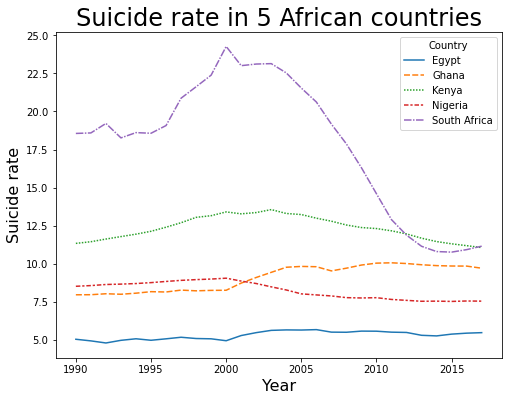

In [22]:
#sns.lineplot(x=year, y=suicide_rate, hue = country, style = country, data =df, ci=None).set(title='Suicide rate in 5 African countries')
#sns.set(rc={'figure.figsize':(12,10)})
plt.figure(figsize=(8,6))
sns.lineplot(x=year, y=suicide_rate, hue = country, style = country, data =df, ci=None)
plt.xlabel("Year", size=16)
plt.ylabel("Suicide rate", size=16)
plt.title("Suicide rate in 5 African countries", size=24)

Text(0.5, 1.0, 'Depressive disorder rate in 5 African countries')

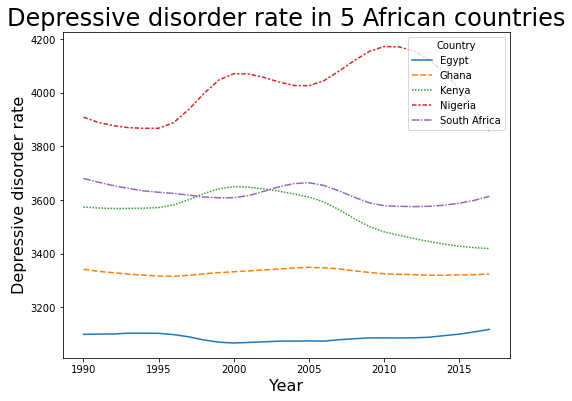

In [23]:
plt.figure(figsize=(8,6))
sns.lineplot(x=year, y=depressive_disorder, hue = country, style = country, data =df, ci=None)
plt.xlabel("Year", size=16)
plt.ylabel("Depressive disorder rate", size=16)
plt.title("Depressive disorder rate in 5 African countries", size=24)
#plt.savefig('depressive disorder.png')

### Qu1b: Can we conclude that suicide rate over the years differ by country?

#### We will be using  ANOVA test of mean values of suicide rate accross the 5 countries




First, we group the data into categories as the one-way ANOVA can't work with continuous variable -  we will create a new column for this newly assigned group our categoriesb e:
- Ghana
- Nigeria
- Egypt
- Kenya
- South Africa

## State the hypothesis

- 𝐻0:µ1=µ2=µ3  (the five population means are equal)
- 𝐻1:  At least one of the means differ

In [24]:
mental_health_data.loc[(mental_health_data['Country']== 'Ghana'), 'country_group'] = 'Ghana'
mental_health_data.loc[(mental_health_data['Country']== 'Egypt'), 'country_group'] = 'Egypt'
mental_health_data.loc[(mental_health_data['Country']== 'Kenya'), 'country_group'] = 'Kenya'
mental_health_data.loc[(mental_health_data['Country']== 'Nigeria'), 'country_group'] = 'Nigeria'
mental_health_data.loc[(mental_health_data['Country']== 'South Africa'), 'country_group'] = 'South Africa'

In [25]:
mental_health_data_country_suicide =mental_health_data .groupby('Country').agg({suicide_rate :['mean', 'std', 'var']}).reset_index()
mental_health_data_country_suicide.head()

Country Suicide rate (deaths per 100,000 individuals)            \
                                                         mean       std   
0         Egypt                                      0.026025  0.013637   
1         Ghana                                      0.220395  0.043140   
2         Kenya                                      0.387383  0.040114   
3       Nigeria                                      0.177391  0.028539   
4  South Africa                                      0.673447  0.227282   

             
        var  
0  0.000186  
1  0.001861  
2  0.001609  
3  0.000814  
4  0.051657

In [26]:
scipy.stats.levene(mental_health_data[mental_health_data['country_group'] == 'Ghana'][suicide_rate],
                   mental_health_data[mental_health_data['country_group'] == 'Egypt'][suicide_rate],
                   mental_health_data[mental_health_data['country_group'] == 'Kenya'][suicide_rate],
                   mental_health_data[mental_health_data['country_group'] == 'Nigeria'][suicide_rate],
                   mental_health_data[mental_health_data['country_group'] == 'South Africa'][suicide_rate],
                   center='mean')
#since the variance is different we will use log normalization in order to proceed to hypothesis testing

LeveneResult(statistic=43.657525277909556, pvalue=1.8090701500495245e-23)

In [27]:
ghana_suicide_rate = mental_health_data[mental_health_data['country_group'] == 'Ghana'][suicide_rate]
nigeria_suicide_rate =  mental_health_data[mental_health_data['country_group'] == 'Nigeria'][suicide_rate]
egypt_suicide_rate  = mental_health_data[mental_health_data['country_group'] == 'Egypt'][suicide_rate]
kenya_suicide_rate  = mental_health_data[mental_health_data['country_group'] == 'Kenya'][suicide_rate]
south_africa_suicide_rate =mental_health_data[mental_health_data['country_group'] == 'South Africa'][suicide_rate]

In [28]:
f_statistic, p_value = scipy.stats.f_oneway(ghana_suicide_rate, nigeria_suicide_rate, egypt_suicide_rate,kenya_suicide_rate,south_africa_suicide_rate)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 151.83088544981337, P-Value: 6.0591342346069416e-49


### Conclusion: Research question 1b
Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.                                
**From the Anova test carried out we can say that there is a statistical significant difference of suicide rates over the 25-year period between countries**


### Qu.2 What is the average suicide rate in the countries?

In [29]:
new_df = pd.DataFrame(df.groupby(country).mean()['Suicide rate (deaths per 100,000 individuals)'].sort_values(ascending=False).reset_index())
#converting the suicide rate to percentage
#new_df['Suicide rate (deaths per 100,000 individuals)'] = (new_df['Suicide rate (deaths per 100,000 individuals)'] / 1000).round(2)
#df = df.rename(columns={'Suicide rate (deaths per 100,000 individuals)':'Suicide rate'})

Text(0.5, 1.0, 'Average rate of Suicide in the 5 countries')

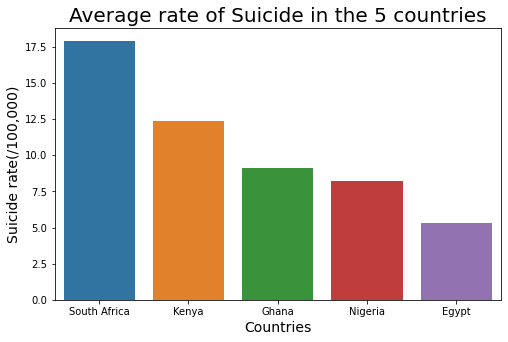

In [30]:
#sns.set(rc={'figure.figsize':(8,6)},style='whitegrid')

plt.figure(figsize=(8,5))
sns.barplot(x=country, y=suicide_rate, data=new_df)
plt.xlabel('Countries', size=14)

plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Average rate of Suicide in the 5 countries', size=20)

#plt.savefig('suicide rate per 100,000.png')

### 3a. Can we conclude that there is a relationship between suicide rate prevalence and the prevalence of depression across the 5 countries ?

Text(0.5, 1.0, 'Suicide rate prevalence in the 5 countries')

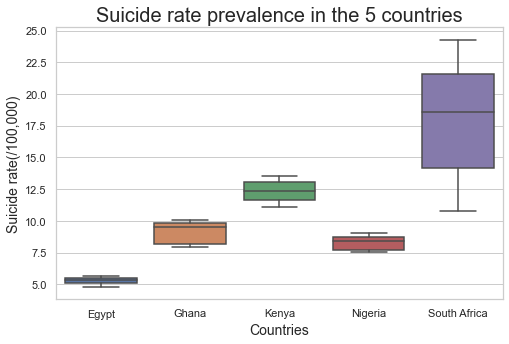

In [31]:
#First we will consider the distribution of suicide rate and the mental health disorders in the 5 countries
sns.set(rc={'figure.figsize':(8,5)},style='whitegrid')
sns.boxplot(x=country,y=suicide_rate,data=df)
plt.xlabel('Countries', size=14)

plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate prevalence in the 5 countries', size=20)
#plt.savefig('suicide rate prevalence/ 100,000.png')


Text(0.5, 1.0, 'Suicide rate vs Depressive disorder rate in the 5 countries')

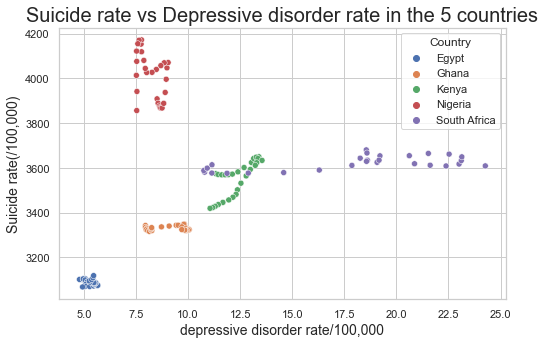

In [32]:
sns.set(rc={'figure.figsize':(8,5)},style='whitegrid')
ax = sns.scatterplot(x=suicide_rate, y=depressive_disorder, data=df,hue=country).set(title='Suicide rate vs Depressive disorder rate in the 5 countries')
plt.xlabel('depressive disorder rate/100,000', size=14)

plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate vs Depressive disorder rate in the 5 countries', size=20)
#plt.savefig('suicide vs depressivedisordre.png')

In [33]:
#General correlation between suicide rate and depressive disorder in the 5 countries
suicide_rates  = mental_health_data[suicide_rate]
depressive_disorders = mental_health_data[depressive_disorder]
pearsonr= scipy.stats.pearsonr(mental_health_data[suicide_rate], mental_health_data[depressive_disorder])
(correlation, pValue) = pearsonr
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.30968983863416477
It is  statistically significant.


**We will now consider the correlation between suicide rate and depressive disorder(the most common mental disorder) in the each of the 5 countries**

In [34]:
#Creating dataframes for each of the countries
df_South_Africa = df.query("Country == 'South Africa'")
df_Nigeria =  df.query("Country == 'Nigeria'")
df_kenya = df.query("Country == 'Kenya'")
df_ghana = df.query("Country == 'Ghana'")
df_Egypt =df.query("Country == 'Egypt'")
mental_health_South_Africa = mental_health_data.query("Country == 'South Africa'")
mental_health_Nigeria = mental_health_data.query("Country == 'Nigeria'")
mental_health_kenya = mental_health_data.query("Country == 'Kenya'")
mental_health_ghana = mental_health_data.query("Country == 'Ghana'")
mental_health_Egypt =mental_health_data.query("Country == 'Egypt'")

Text(0.5, 1.0, 'Suicide rate vs Depressive disorder rate in South Africa')

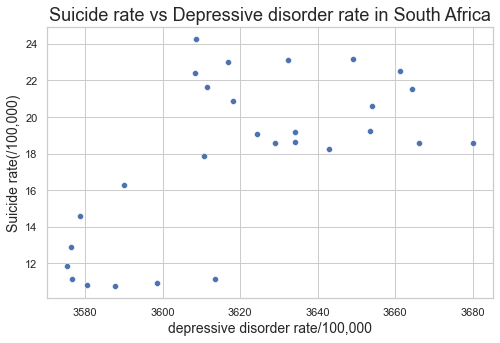

In [35]:
# South Africa
ax = sns.scatterplot(x=depressive_disorder, y=suicide_rate, data=df_South_Africa )
plt.xlabel('depressive disorder rate/100,000', size=14)

plt.ylabel('Suicide rate(/100,000)', size=14)

plt.title('Suicide rate vs Depressive disorder rate in South Africa', size=18)
#plt.savefig('suicide vs depressivedisordre_southafrica.png')


In [36]:
suicide_rate_south_africa  = df_South_Africa[suicide_rate]
depressive_disorder_rate_south_africa =df_South_Africa[depressive_disorder]
pearsonr= scipy.stats.pearsonr(suicide_rate_south_africa, depressive_disorder_rate_south_africa)
(correlation, pValue) = pearsonr
print('The correlation in South Africa is', correlation)
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')
    

The correlation in South Africa is 0.6282616953712414
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate vs Depressive disorder rate in Nigeria')

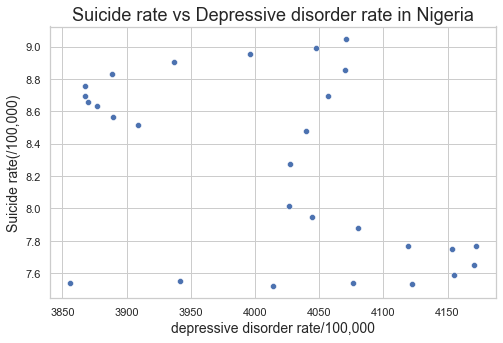

In [37]:
#Nigeria
ax = sns.scatterplot(x=depressive_disorder, y=suicide_rate, data=df_Nigeria )
plt.xlabel('depressive disorder rate/100,000', size=14)

plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate vs Depressive disorder rate in Nigeria', size=18)
#plt.savefig('suicide vs depressivedisordre.Nigeria.png')

In [38]:
suicide_rate_Nigeria  = df_Nigeria[suicide_rate]
depressive_disorder_rate_Nigeria =df_Nigeria[depressive_disorder]
pearsonr= scipy.stats.pearsonr(suicide_rate_Nigeria, depressive_disorder_rate_Nigeria)
(correlation, pValue) = pearsonr
print('The correlation  in Nigeria is', correlation)
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation  in Nigeria is -0.4503510834909108
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate vs Depressive disorder rate in Kenya')

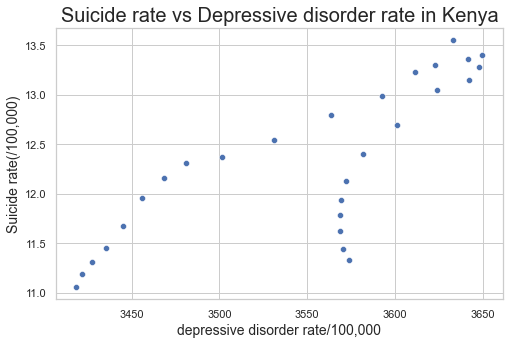

In [39]:
#Kenya
ax = sns.scatterplot(x=depressive_disorder, y=suicide_rate, data=df_kenya )
plt.xlabel('depressive disorder rate/100,000', size=14)

plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate vs Depressive disorder rate in Kenya', size=20)
#plt.savefig('suicide vs depressivedisordre.Kenya.png')

In [40]:
suicide_rate_kenya  = df_kenya[suicide_rate]
depressive_disorder_rate_kenya =df_kenya[depressive_disorder]
pearsonr= scipy.stats.pearsonr(suicide_rate_kenya, depressive_disorder_rate_kenya)
(correlation, pValue) = pearsonr
print('The correlation in Kenya is', correlation)
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation in Kenya is 0.7842119497775214
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate vs Depressive disorder rate in Ghana')

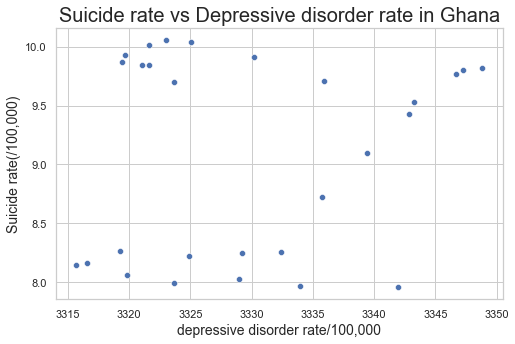

In [41]:
#Ghana
ax = sns.scatterplot(x=depressive_disorder, y=suicide_rate, data=df_ghana )
plt.xlabel('depressive disorder rate/100,000', size=14)

plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate vs Depressive disorder rate in Ghana', size=20)
#plt.savefig('suicide vs depressivedisordre_Ghana.png')

In [42]:
suicide_rate_ghana  = df_ghana[suicide_rate]
depressive_disorder_rate_ghana =df_ghana[depressive_disorder]
pearsonr= scipy.stats.pearsonr(suicide_rate_ghana, depressive_disorder_rate_ghana)
(correlation, pValue) = pearsonr
print('The correlation in Ghana is', correlation)
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation in Ghana is 0.14904886239027323
It is not statistically significant.


Text(0.5, 1.0, 'Suicide rate vs Depressive disorder rate in Egypt')

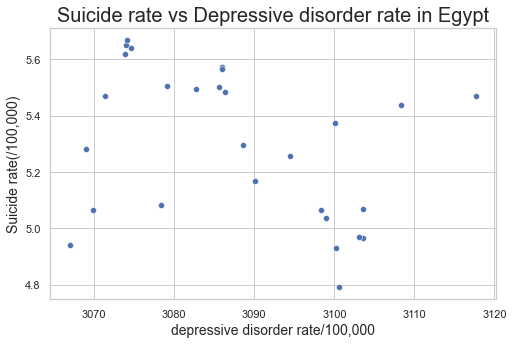

In [43]:
#Egypt
ax = sns.scatterplot(x=depressive_disorder, y=suicide_rate, data=df_Egypt )
plt.xlabel('depressive disorder rate/100,000', size=14)

plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate vs Depressive disorder rate in Egypt', size=20)

#plt.savefig('suicide vs depressivedisordre_Egypt.png')

In [44]:
suicide_rate_Egypt  = df_Egypt[suicide_rate]
depressive_disorder_rate_Egypt =df_Egypt[depressive_disorder]
pearsonr= scipy.stats.pearsonr(suicide_rate_Egypt, depressive_disorder_rate_Egypt)
(correlation, pValue) = pearsonr
print('The correlation in Egypt is', correlation)
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation in Egypt is -0.34754463207143604
It is not statistically significant.


### Conclusion :Research Question 3a
**Generally the suicide rate is positively correlated to the depressive disorder rate accross countries,that is an increase in depressive disorder rate leads to an increase in suicide rate.Considering the individual countries:**
 - **The countries with statistically significant correlation are:**
   - South Africa : **An increase in depressive disorder rates is associated with an increase in suicide rate**
   - Kenya : **An increase in depressive disorder rates is associated with an increase in suicide rate**
   - Nigeria : **An increase in depressive disorder rates is associated with a decrease in suicide rate**

### 3b. Can we conclude that there is a relationship between suicide rate  and the prevalence of mental health disorder across the 5 countries?

**Correlation: Using the mental health dataset, Is suicide rate correlated with mental health disorder ?**

Text(0.5, 1.0, 'Mental health disorder in the 5 countries')

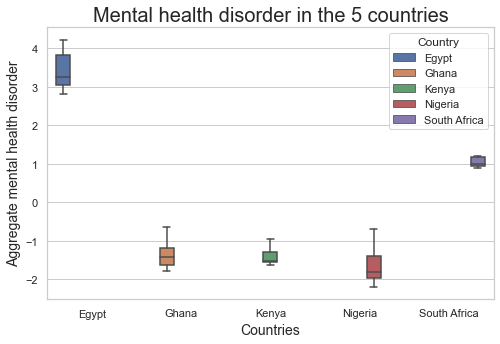

In [45]:
ax = sns.boxplot(x=country, y=mental_health_disorders, data=mental_health_data,hue=country)
plt.xlabel('Countries', size=14)

plt.ylabel('Aggregate mental health disorder', size=14)
plt.title('Mental health disorder in the 5 countries', size=20)
#plt.savefig('suicide vs depressivedisordre_Ghana.png')

**We can see that Egypt has the highest rate when all mental health disorders are aggregated and the differences accounted for using Principal component analysis**

Text(0.5, 1.0, 'Schizophrenia rate in the 5 countries')

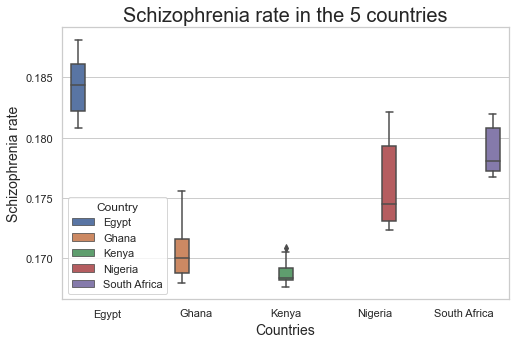

In [46]:
ax = sns.boxplot(x=country, y='Schizophrenia (%)', data=df,hue=country)
plt.xlabel('Countries', size=14)

plt.ylabel('Schizophrenia rate', size=14)
plt.title('Schizophrenia rate in the 5 countries', size=20)
#plt.savefig('suicide vs depressivedisordre_Ghana.png')

Text(0.5, 1.0, 'Bipolar disorder rate in the 5 countries')

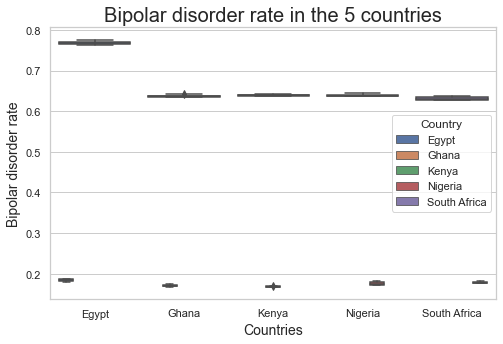

In [47]:
ax = sns.boxplot(x=country, y='Bipolar disorder (%)', data=df)
ax = sns.boxplot(x=country, y='Schizophrenia (%)', data=df,hue=country)
plt.xlabel('Countries', size=14)

plt.ylabel('Bipolar disorder rate', size=14)
plt.title('Bipolar disorder rate in the 5 countries', size=20)

Text(0.5, 1.0, 'Eating disorder rate in the 5 countries')

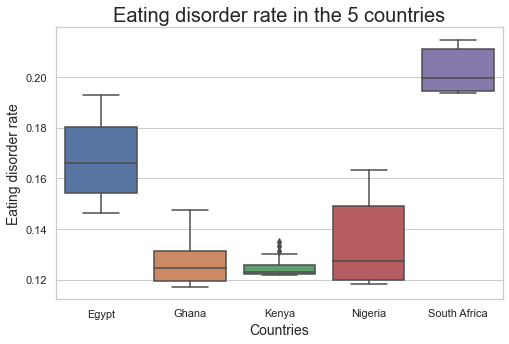

In [48]:
ax = sns.boxplot(x=country, y='Eating disorders (%)', data=df)
plt.xlabel('Countries', size=14)

plt.ylabel('Eating disorder rate', size=14)
plt.title('Eating disorder rate in the 5 countries', size=20)

Text(0.5, 1.0, 'Anxiety disorder rate in the 5 countries')

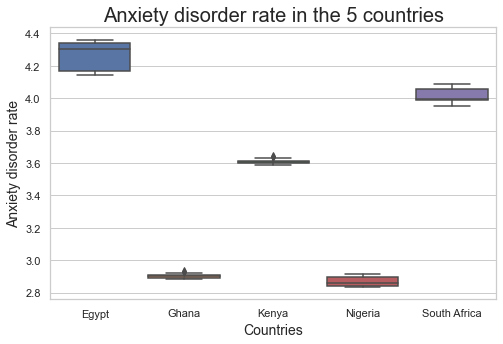

In [49]:
ax = sns.boxplot(x=country, y='Anxiety disorders (%)', data=df)
plt.xlabel('Countries', size=14)

plt.ylabel('Anxiety disorder rate', size=14)
plt.title('Anxiety disorder rate in the 5 countries', size=20)

Text(0.5, 1.0, 'Drug use disorder rate in the 5 countries')

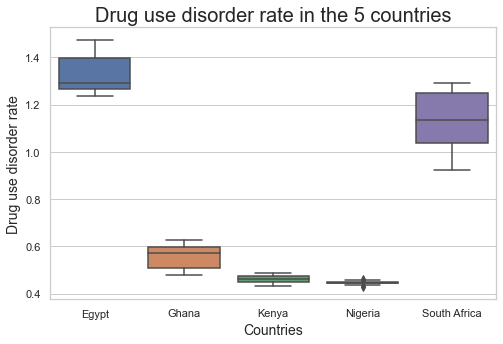

In [50]:
ax = sns.boxplot(x=country, y='Drug use disorders (%)', data=df)
plt.xlabel('Countries', size=14)

plt.ylabel('Drug use disorder rate', size=14)
plt.title('Drug use disorder rate in the 5 countries', size=20)

Text(0.5, 1.0, 'Alcohol use disorder rate in the 5 countries')

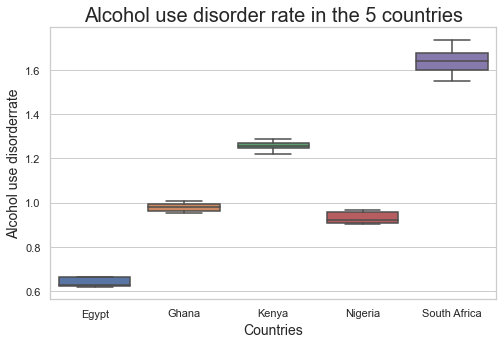

In [51]:
ax = sns.boxplot(x=country, y='Alcohol use disorders (%)', data=df)
plt.xlabel('Countries', size=14)

plt.ylabel('Alcohol use disorderrate', size=14)
plt.title('Alcohol use disorder rate in the 5 countries', size=20)

### In order to answer Research Question 3b we will be using Correlation using pearson r correlation
**State the hypothesis**
- 𝐻0:suicide rate  is not correlated with mental health disorders                                                                         
- 𝐻1: suicide rate is correlated with mental health disorders 

**We will consider each mental health disorder generally and for each country in order to test the hypothesis.**

Text(0.5, 1.0, 'Suicide rate vs mental health disorder rate')

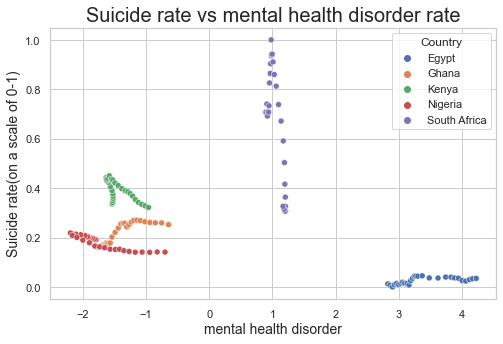

In [52]:
ax = sns.scatterplot(x=mental_health_disorders, y=suicide_rate, data=mental_health_data,hue=country)
plt.xlabel('mental health disorder', size=14)

plt.ylabel('Suicide rate(on a scale of 0-1)', size=14)
plt.title('Suicide rate vs mental health disorder rate', size=20)

In [53]:
suicide_rates  = mental_health_data[suicide_rate]
mental_health_disorders =mental_health_data[mental_health_disorders]
pearsonr= scipy.stats.pearsonr(suicide_rates, mental_health_disorders)
(correlation, pValue) = pearsonr
print('The correlation of suicide rate to the aggregate mental health disorder is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of suicide rate to the aggregate mental health disorder is -0.15
It is not statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Schizophrenia rate in the 5 countries')

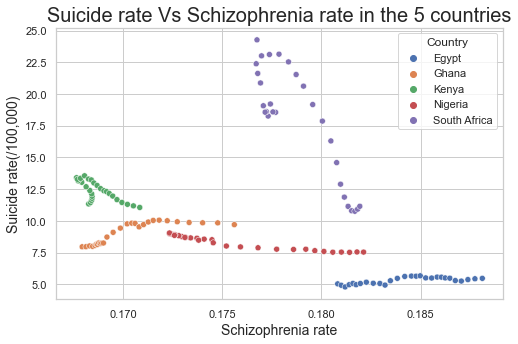

In [54]:
# Schizophrenia
ax = sns.scatterplot(x='Schizophrenia (%)', y=suicide_rate, data=df,hue=country)
plt.xlabel('Schizophrenia rate', size=14)

plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Schizophrenia rate in the 5 countries', size=20)


In [55]:
#Aggregate correlation of schizopherenia across all the countries
suicide_rates  = df[suicide_rate]
Schizophrenia =df['Schizophrenia (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates, Schizophrenia)
(correlation, pValue) = pearsonr
print('The correlation for Suicide rate vs Schizophrenia in the 5 countries over the years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')
    

The correlation for Suicide rate vs Schizophrenia in the 5 countries over the years is -0.24
It is  statistically significant.


**We will now zoom in into each of the 5 countries**

Text(0.5, 1.0, 'Suicide rate Vs Schizophrenia rate in Ghana over 25 years')

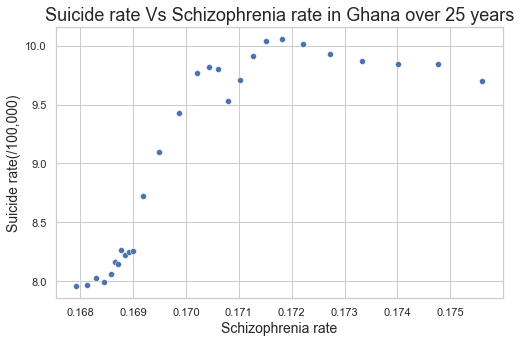

In [56]:
ax = sns.scatterplot(x='Schizophrenia (%)', y=suicide_rate, data=df_ghana)
plt.xlabel('Schizophrenia rate', size=14)

plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Schizophrenia rate in Ghana over 25 years', size=18)


In [57]:
suicide_rate_ghana  = df_ghana[suicide_rate]
schizophrenia_ghana =df_ghana['Schizophrenia (%)']
pearsonr= scipy.stats.pearsonr(suicide_rate_ghana, schizophrenia_ghana)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Schizophrenia rate in Ghana', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Schizophrenia rate in Ghana 0.81
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Schizophrenia rate in Kenya over 25 years')

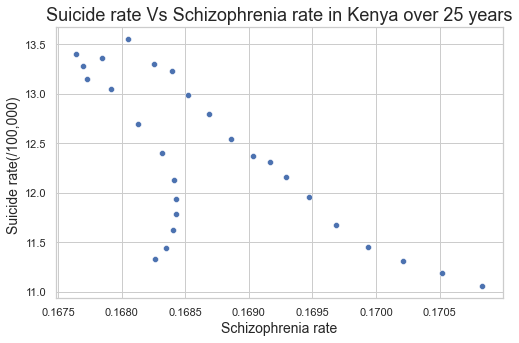

In [58]:
ax = sns.scatterplot(x='Schizophrenia (%)', y=suicide_rate, data=df_kenya)
plt.xlabel('Schizophrenia rate', size=14)

plt.ylabel('Suicide rate(/100,000) ', size=14)
plt.title('Suicide rate Vs Schizophrenia rate in Kenya over 25 years', size=18)


In [59]:
suicide_rate_kenya  = df_kenya[suicide_rate]
schizophrenia_kenya =df_kenya['Schizophrenia (%)']
pearsonr= scipy.stats.pearsonr(suicide_rate_kenya, schizophrenia_kenya )
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Schizophrenia rate in Kenya is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Schizophrenia rate in Kenya is -0.73
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Schizophrenia rate in Egypt over 25 years')

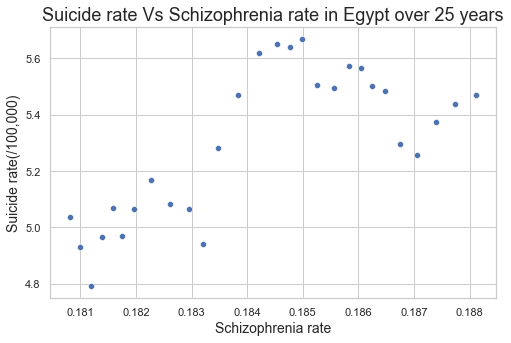

In [60]:
ax = sns.scatterplot(x='Schizophrenia (%)', y=suicide_rate, data=df_Egypt)
plt.xlabel('Schizophrenia rate', size=14)

plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Schizophrenia rate in Egypt over 25 years', size=18)


In [61]:
suicide_rate_egypt  = df_Egypt[suicide_rate]
schizophrenia_egypt =df_Egypt['Schizophrenia (%)']
pearsonr= scipy.stats.pearsonr(suicide_rate_egypt, schizophrenia_egypt )
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Schizophrenia rate in Egypt is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Schizophrenia rate in Egypt is 0.73
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Schizophrenia rate in Nigeria over 25 years')

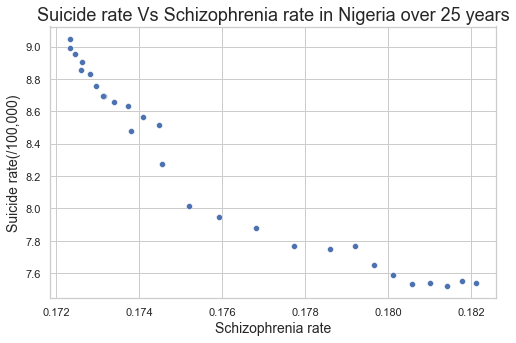

In [62]:
ax = sns.scatterplot(x='Schizophrenia (%)', y=suicide_rate, data=df_Nigeria)
plt.xlabel('Schizophrenia rate', size=14)

plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Schizophrenia rate in Nigeria over 25 years', size=18)


In [63]:
suicide_rate_nigeria  = df_Nigeria[suicide_rate]
schizophrenia_nigeria =df_Nigeria['Schizophrenia (%)']
pearsonr= scipy.stats.pearsonr(suicide_rate_nigeria, schizophrenia_nigeria )
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Schizophrenia rate in Nigeria is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Schizophrenia rate in Nigeria is -0.96
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Schizophrenia rate in South Africa over 25 years')

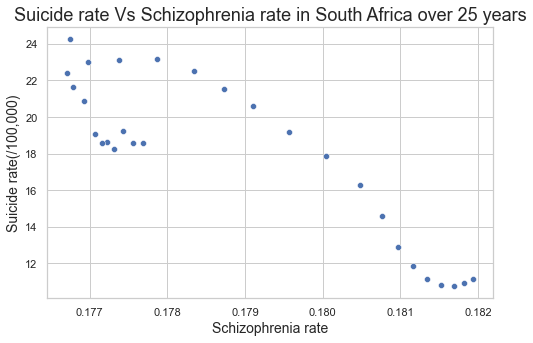

In [64]:
ax = sns.scatterplot(x='Schizophrenia (%)', y=suicide_rate, data=df_South_Africa )
plt.xlabel('Schizophrenia rate', size=14)

plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Schizophrenia rate in South Africa over 25 years', size=18)

In [65]:
suicide_rate_South_Africa  = df_South_Africa[suicide_rate]
schizophrenia_South_Africa =df_South_Africa['Schizophrenia (%)']
pearsonr= scipy.stats.pearsonr(suicide_rate_South_Africa, schizophrenia_South_Africa )
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Schizophrenia rate in South Africa over 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Schizophrenia rate in South Africa over 25 years is -0.88
It is  statistically significant.


#### In conclusion for Schizophrenia; we can reject the null hypothesis that there is no relationship between Suicide rate and schizophrenia in the 5 countries
**Countries that have an increase rate in schizophrenia associated with an increase in suicide rates in order of magnitude of correlation are:**
- Ghana
- Egypt

**While countries that have an increase rate in schizophrenia associated with a decrease in suicide rates in order of magnitude of correlation are :**
- Nigeria
- South Africa
- Kenya

Text(0.5, 1.0, 'Suicide rate Vs Bipolar disorder rate in five countries in Africa')

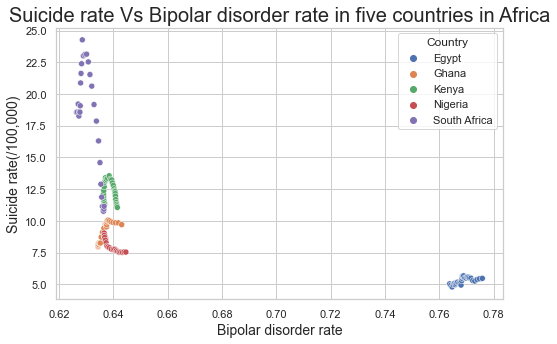

In [66]:
# Bipolar Disorder
ax = sns.scatterplot(x='Bipolar disorder (%)', y=suicide_rate, data=df,hue=country)
plt.xlabel('Bipolar disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Bipolar disorder rate in five countries in Africa', size=20)

In [67]:
#Aggregate correlation of Bipolar disorders across all the countries
suicide_rates  = df[suicide_rate]
bipolar_disorders =df['Bipolar disorder (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates, bipolar_disorders)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Bipolar disorder rate across all countries is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')
    

The correlation of Suicide rate to Bipolar disorder rate across all countries is -0.59
It is  statistically significant.


**We will now zoom in into each of the 5 countries**

Text(0.5, 1.0, 'Suicide rate Vs Bipolar disorder rate in Ghana over 25 years')

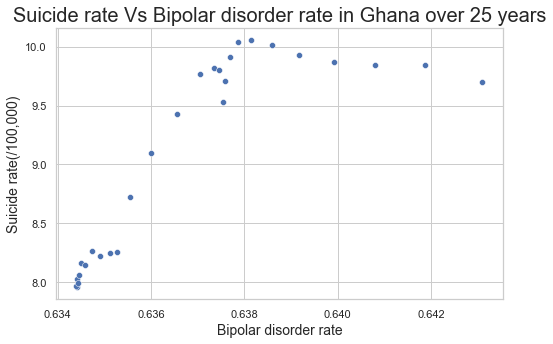

In [68]:
#Ghana
ax = sns.scatterplot(x='Bipolar disorder (%)', y=suicide_rate, data=df_ghana)
plt.xlabel('Bipolar disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Bipolar disorder rate in Ghana over 25 years', size=20)

In [69]:
suicide_rates_ghana  = df_ghana[suicide_rate]
bipolar_disorders_ghana =df_ghana['Bipolar disorder (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_ghana,bipolar_disorders_ghana)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Bipolar disorder rate in Ghana over the 25 year period is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Bipolar disorder rate in Ghana over the 25 year period is 0.82
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Bipolar disorder rate in Kenya over 25 years')

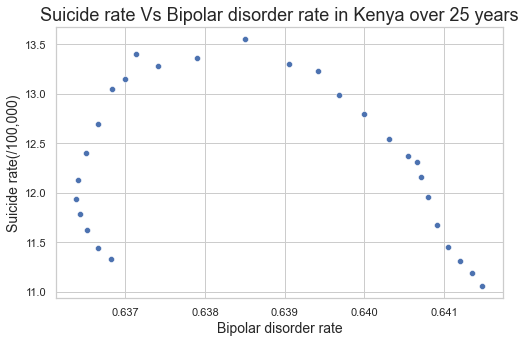

In [70]:
ax = sns.scatterplot(x='Bipolar disorder (%)', y=suicide_rate, data=df_kenya)
plt.xlabel('Bipolar disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Bipolar disorder rate in Kenya over 25 years', size=18)

In [71]:
suicide_rates_kenya  = df_kenya[suicide_rate]
bipolar_disorders_kenya =df_kenya['Bipolar disorder (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_kenya,bipolar_disorders_kenya)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Bipolar disorder in Kenya over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Bipolar disorder in Kenya over the 25 years is -0.27
It is not statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Bipolar disorder in Kenya over 25 years')

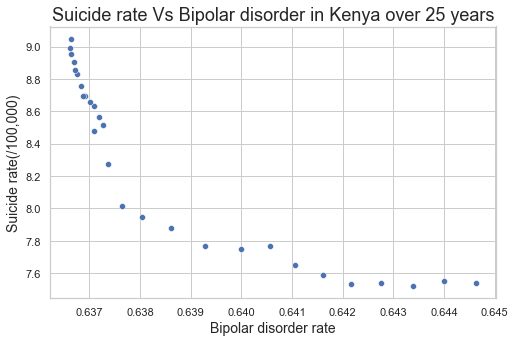

In [72]:
ax = sns.scatterplot(x='Bipolar disorder (%)', y=suicide_rate, data=df_Nigeria)
plt.xlabel('Bipolar disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Bipolar disorder in Kenya over 25 years', size=18)

In [73]:
suicide_rates_nigeria  = df_Nigeria[suicide_rate]
bipolar_disorders_nigeria =df_Nigeria['Bipolar disorder (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_kenya,bipolar_disorders_nigeria)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Bipolar disorder in Nigeria over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Bipolar disorder in Nigeria over the 25 years is -0.63
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Bipolar disorder rate in Egypt over 25 years')

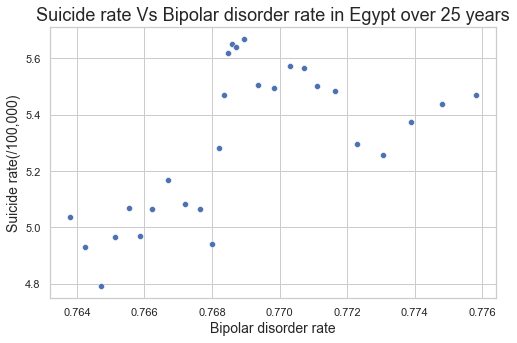

In [74]:
ax = sns.scatterplot(x='Bipolar disorder (%)', y=suicide_rate, data=df_Egypt)
plt.xlabel('Bipolar disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Bipolar disorder rate in Egypt over 25 years', size=18)

In [75]:
suicide_rates_egypt  = df_Egypt[suicide_rate]
bipolar_disorders_egypt=df_Egypt['Bipolar disorder (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_egypt,bipolar_disorders_egypt)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Bipolar rate in Egypt over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Bipolar rate in Egypt over the 25 years is 0.61
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Bipolar disorder rate in South Africa over 25 years')

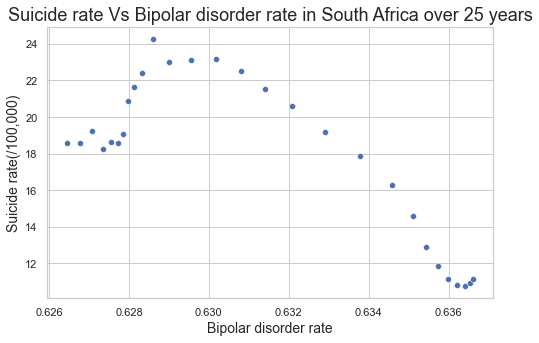

In [76]:
ax = sns.scatterplot(x='Bipolar disorder (%)', y=suicide_rate, data=df_South_Africa)
plt.xlabel('Bipolar disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Bipolar disorder rate in South Africa over 25 years', size=18)

In [77]:
suicide_rates_south_africa  = df_South_Africa[suicide_rate]
bipolar_disorders_south_africa = df_South_Africa['Bipolar disorder (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_south_africa ,bipolar_disorders_south_africa)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Bipolar disorder rate over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Bipolar disorder rate over the 25 years is -0.78
It is  statistically significant.


#### In conclusion for Bipolar disorder; we can reject the null hypothesis that there is no relationship between Suicide rate and schizophrenia in the 4 countries since there is evidence that there is a relationship between suicide rate and bipolar disorders in these 5 countries,however for kenya  we fail to reject the null hypothesis
**Countries that have an increase rate in schizophrenia associated with an increase in suicide rates in order of magnitude of correlation are:**
- Ghana
- Egypt

**While countries that have an increase rate in schizophrenia associated with a decrease in suicide rates in order of magnitude of correlation are :**
- South Africa
- Nigeria

Text(0.5, 1.0, 'Suicide rate Vs Eating disorder rate in the 5 countries over 25 years')

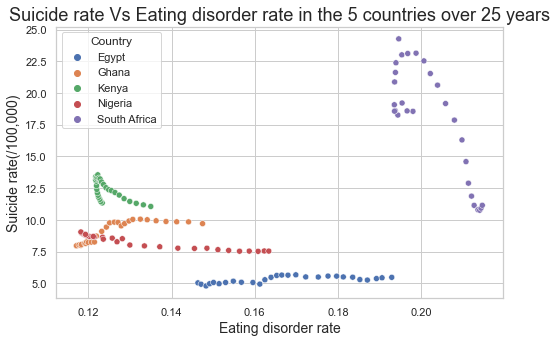

In [78]:
# Eating disorder
ax = sns.scatterplot(x='Eating disorders (%)', y=suicide_rate, data=df,hue=country)
plt.xlabel('Eating disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Eating disorder rate in the 5 countries over 25 years', size=18)

In [79]:
#Aggregate correlation of Eating disorders across all the countries
suicide_rates  = df[suicide_rate]
Eating_disorder =df['Eating disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates, Eating_disorder)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Eating disorder rate in the five(5) countries over the 25 year is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Eating disorder rate in the five(5) countries over the 25 year is 0.38
It is  statistically significant.


**We zoom into each country**

Text(0.5, 1.0, 'Suicide rate Vs Eating disorder rate in Ghana over 25 years')

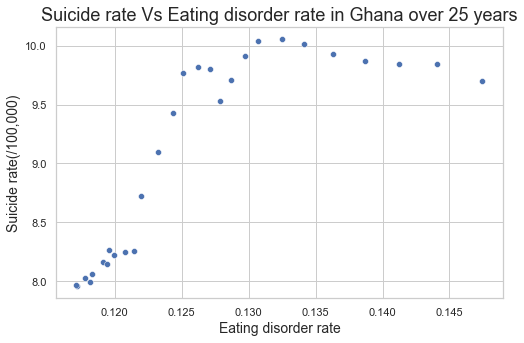

In [80]:
ax = sns.scatterplot(x='Eating disorders (%)', y=suicide_rate, data= df_ghana)
plt.xlabel('Eating disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Eating disorder rate in Ghana over 25 years', size=18)

In [81]:
suicide_rates_ghana  = df_ghana[suicide_rate]
Eating_disorders_ghana =df_ghana['Eating disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_ghana,Eating_disorders_ghana)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Eating disorder rate in Ghana over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')
    

The correlation of Suicide rate to Eating disorder rate in Ghana over the 25 years is 0.81
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Eating disorder rate in Kenya over 25 years')

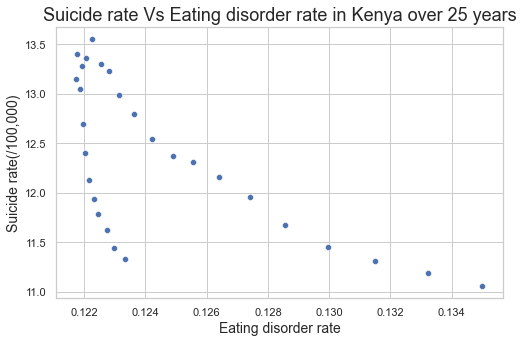

In [82]:
ax = sns.scatterplot(x='Eating disorders (%)', y=suicide_rate, data=  df_kenya)
plt.xlabel('Eating disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Eating disorder rate in Kenya over 25 years', size=18)

In [83]:
suicide_rates_kenya  = df_kenya[suicide_rate]
Eating_disorders_kenya =df_kenya['Eating disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_kenya ,Eating_disorders_kenya)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Eating disorder rate in Kenya over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')
    

The correlation of Suicide rate to Eating disorder rate in Kenya over the 25 years is -0.68
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Eating disorder rate in Nigeria over 25 years')

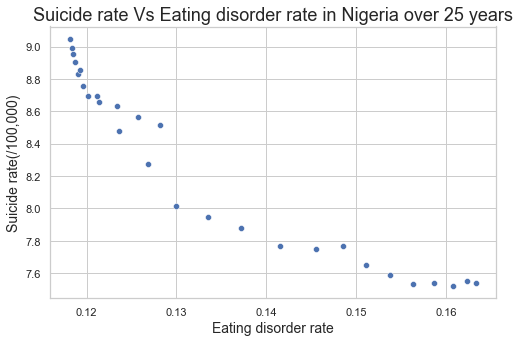

In [84]:
ax = sns.scatterplot(x='Eating disorders (%)', y=suicide_rate, data=df_Nigeria)
plt.xlabel('Eating disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Eating disorder rate in Nigeria over 25 years', size=18)

In [85]:
suicide_rates_nigeria  = df_Nigeria[suicide_rate]
Eating_disorders_nigeria =df_Nigeria['Eating disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_nigeria  ,Eating_disorders_nigeria)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Eating disorder rate in Nigeria over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Eating disorder rate in Nigeria over the 25 years is -0.95
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Eating disorder rate in Egypt over 25 years')

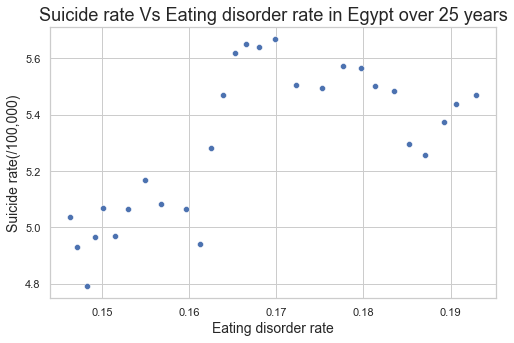

In [86]:
ax = sns.scatterplot(x='Eating disorders (%)', y=suicide_rate, data=df_Egypt)
plt.xlabel('Eating disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Eating disorder rate in Egypt over 25 years', size=18)

In [87]:
suicide_rates_egypt  = df_Egypt[suicide_rate]
Eating_disorders_egypt =df_Egypt['Eating disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_egypt ,Eating_disorders_egypt)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Eating disorder rate in Egypt over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Eating disorder rate in Egypt over the 25 years is 0.68
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Eating disorder rate in South Africa over 25 years')

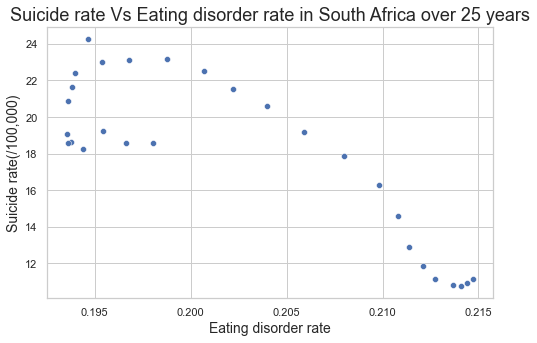

In [88]:
ax = sns.scatterplot(x='Eating disorders (%)', y=suicide_rate, data=df_South_Africa)
plt.xlabel('Eating disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Eating disorder rate in South Africa over 25 years', size=18)

In [89]:
suicide_rates_south_africa  = df_South_Africa[suicide_rate]
Eating_disorders_south_africa =df_South_Africa['Eating disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_south_africa ,Eating_disorders_south_africa)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Eating disorder rate in Egypt over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')
    

The correlation of Suicide rate to Eating disorder rate in Egypt over the 25 years is -0.84
It is  statistically significant.


#### In conclusion for Eating disorder; we can reject the null hypothesis that there is no relationship between Suicide rate and eating disorder in the 5 countries since there is evidence that there is a relationship between suicide rate andeating disorders in these 5 countries.
**Countries that have an increase rate in Eating disorder associated with an increase in suicide rates in order of magnitude of correlation are:**
- Ghana
- Egypt

**While countries that have an increase rate in Eating disorder associated with a decrease in suicide rates in order of magnitude of correlation are :**
- Nigeria
- South Africa
- Kenya

Text(0.5, 1.0, 'Suicide rate Vs Anxiety disorder rate in the five countries over 25 years')

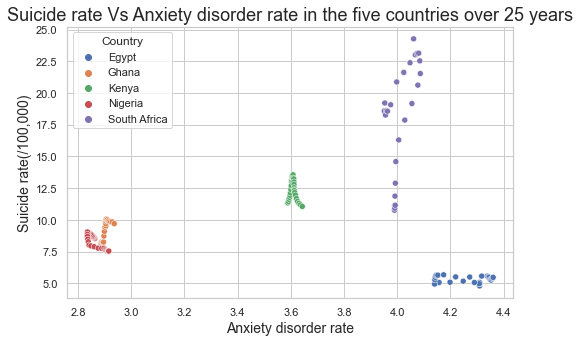

In [90]:
#Anxiety disorders
ax = sns.scatterplot(x='Anxiety disorders (%)', y=suicide_rate, data=df,hue=country)
plt.xlabel('Anxiety disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Anxiety disorder rate in the five countries over 25 years', size=18)

In [91]:
#Aggregate correlation of Anxiety disorders across all the countries
suicide_rates  = df[suicide_rate]
Anxiety_disorders =df['Anxiety disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates, Anxiety_disorders)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Anxiety disorder rate in the five(5) countries over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')
    

The correlation of Suicide rate to Anxiety disorder rate in the five(5) countries over the 25 years is 0.18
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Anxiety disorder rate in Ghana over 25 years')

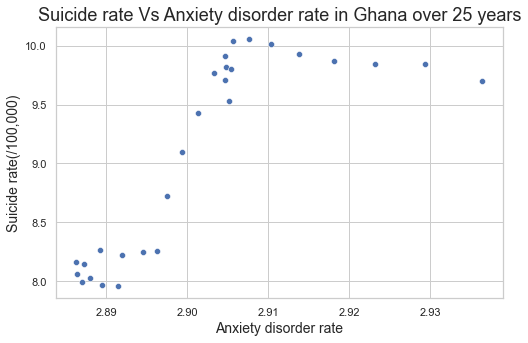

In [92]:
ax = sns.scatterplot(x='Anxiety disorders (%)', y=suicide_rate, data=df_ghana)
plt.xlabel('Anxiety disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Anxiety disorder rate in Ghana over 25 years', size=18)

In [93]:
suicide_rates_ghana  = df_ghana[suicide_rate]
Anxiety_disorders_ghana =df_ghana['Anxiety disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_ghana ,Anxiety_disorders_ghana)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Anxiety disorder rate in Ghana over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Anxiety disorder rate in Ghana over the 25 years is 0.8
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Anxiety disorder rate in Kenya')

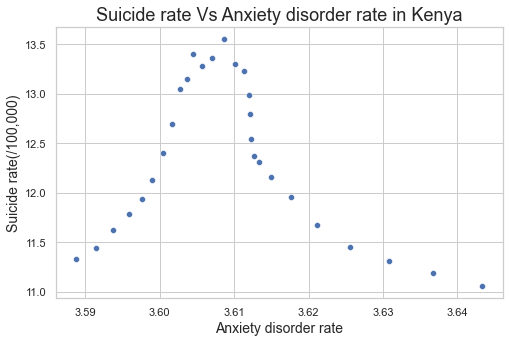

In [94]:
ax = sns.scatterplot(x='Anxiety disorders (%)', y=suicide_rate, data=df_kenya)
plt.xlabel('Anxiety disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Anxiety disorder rate in Kenya', size=18)

In [95]:
suicide_rates_kenya  = df_kenya[suicide_rate]
Anxiety_disorders_kenya =df_kenya['Anxiety disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_kenya ,Anxiety_disorders_kenya)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Anxiety disorder rate in Kenya over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Anxiety disorder rate in Kenya over the 25 years is -0.29
It is not statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Anxiety disorder rate in Nigeria')

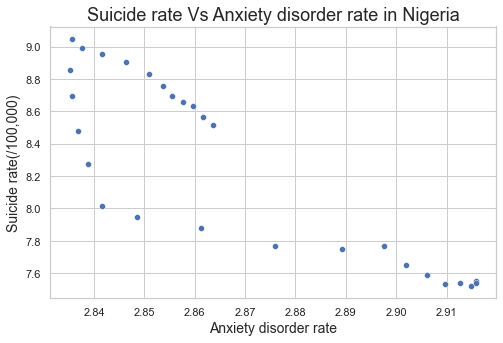

In [96]:
ax = sns.scatterplot(x='Anxiety disorders (%)', y=suicide_rate, data=df_Nigeria)
plt.xlabel('Anxiety disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Anxiety disorder rate in Nigeria', size=18)

In [97]:
suicide_rates_Nigeria  = df_Nigeria[suicide_rate]
Anxiety_disorders_Nigeria  =df_Nigeria ['Anxiety disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_Nigeria  ,Anxiety_disorders_Nigeria )
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Anxiety disorder rate in Nigeria over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Anxiety disorder rate in Nigeria over the 25 years is -0.86
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Anxiety disorder rate in Egypt')

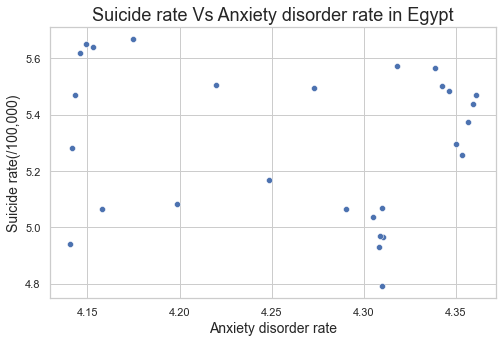

In [98]:
ax = sns.scatterplot(x='Anxiety disorders (%)', y=suicide_rate, data=df_Egypt)
plt.xlabel('Anxiety disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Anxiety disorder rate in Egypt', size=18)

In [99]:
suicide_rates_Egypt  = df_Egypt[suicide_rate]
Anxiety_disorders_Egypt =df_Egypt ['Anxiety disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_Egypt ,Anxiety_disorders_Egypt )
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Anxiety disorder rate in egypt over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Anxiety disorder rate in egypt over the 25 years is -0.15
It is not statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Anxiety disorder rate in South Africa')

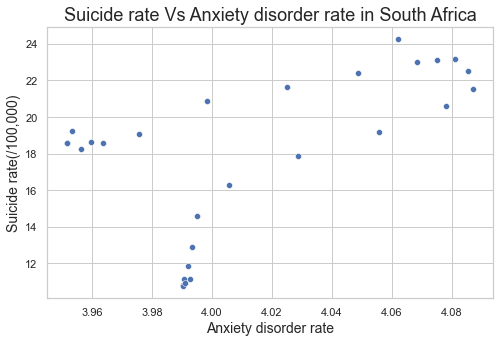

In [100]:
ax = sns.scatterplot(x='Anxiety disorders (%)', y=suicide_rate, data=df_South_Africa)
plt.xlabel('Anxiety disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Anxiety disorder rate in South Africa', size=18)

In [101]:
suicide_rates_South_Africa  = df_South_Africa[suicide_rate]
Anxiety_disorders_South_Africa =df_South_Africa ['Anxiety disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_South_Africa ,Anxiety_disorders_South_Africa )
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Anxiety disorder rate in South Africa over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Anxiety disorder rate in South Africa over the 25 years is 0.55
It is  statistically significant.


#### In conclusion for Anxiety disorder; we can reject the null hypothesis that there is no relationship between Suicide rate and anxiety disorder in the 4 countries since there is evidence that there is a relationship between suicide rate and anxiety disorder in these 5 countries,however for Egypt  we fail to reject the null hypothesis
**Countries that have an increase rate in anxiety disorder associated with an increase in suicide rates in order of magnitude of correlation are:**
- Ghana
- South Africa

**While countries that have an increase rate in anxiety disorder associated with a decrease in suicide rates in order of magnitude of correlation are :**
- Nigeria
- Kenya

Text(0.5, 1.0, 'Suicide rate Vs Drug use disorder rate in the five countries over 25 years')

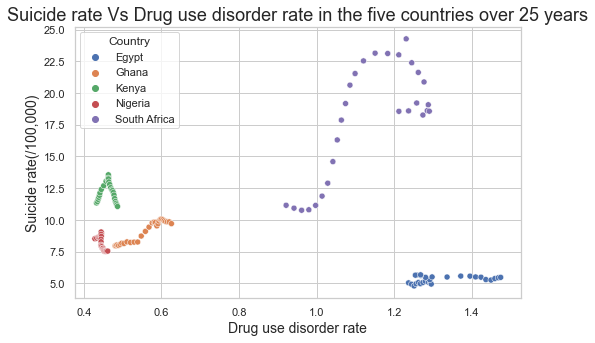

In [102]:
# Drug use Disorder
ax = sns.scatterplot(x='Drug use disorders (%)', y=suicide_rate, data=df,hue=country)
plt.xlabel('Drug use disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Drug use disorder rate in the five countries over 25 years', size=18)

In [103]:
#Aggregate correlation of Drug use disorders across all the countries
suicide_rates  = df[suicide_rate]
Drug_use_disorders =df['Drug use disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates, Drug_use_disorders)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Drug use disorder rate in the five countries over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Drug use disorder rate in the five countries over the 25 years is 0.08
It is not statistically significant.


**Looking at each country**

Text(0.5, 1.0, 'Suicide rate Vs Drug use disorder rate in Ghana over 25 years')

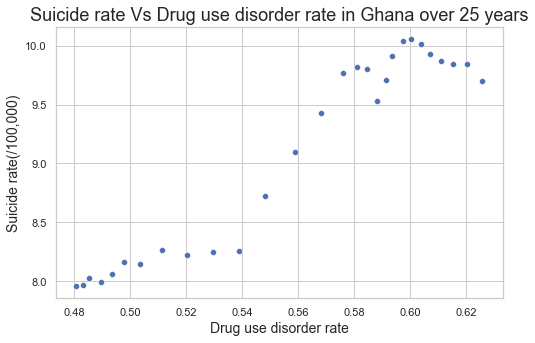

In [104]:
ax = sns.scatterplot(x='Drug use disorders (%)', y=suicide_rate, data=df_ghana)
plt.xlabel('Drug use disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Drug use disorder rate in Ghana over 25 years', size=18)

In [105]:
suicide_rates_ghana  = df_ghana[suicide_rate]
Drug_use_disorders_ghana =df_ghana['Drug use disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_ghana, Drug_use_disorders_ghana)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Drug use disorder rate in Ghana over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Drug use disorder rate in Ghana over the 25 years is 0.96
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Drug use disorder rate in Kenya over 25 years')

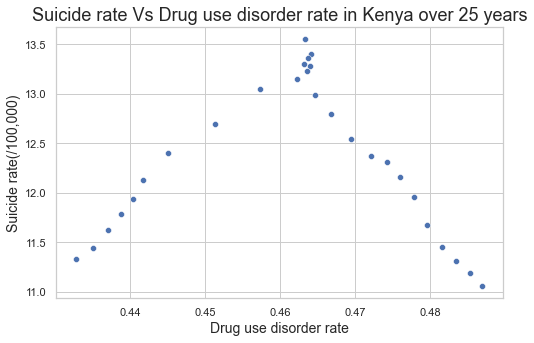

In [106]:
ax = sns.scatterplot(x='Drug use disorders (%)', y=suicide_rate, data=df_kenya)
plt.xlabel('Drug use disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Drug use disorder rate in Kenya over 25 years', size=18)

In [107]:
suicide_rates_kenya  = df_kenya[suicide_rate]
Drug_use_disorders_kenya =df_kenya['Drug use disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_kenya, Drug_use_disorders_kenya)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Drug use disorder rate in Kenya over the 25 years is', correlation.round(2), correlation)
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Drug use disorder rate in Kenya over the 25 years is -0.04 -0.04048545968207609
It is not statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Drug use disorder rate in Egypt over 25 years')

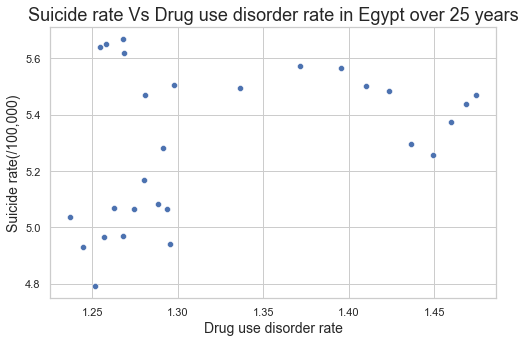

In [108]:
ax = sns.scatterplot(x='Drug use disorders (%)', y=suicide_rate, data=df_Egypt)
plt.xlabel('Drug use disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Drug use disorder rate in Egypt over 25 years', size=18)

In [109]:
suicide_rates_Egypt  = df_Egypt[suicide_rate]
Drug_use_disorders_Egypt =df_Egypt['Drug use disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_Egypt, Drug_use_disorders_Egypt)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Drug use disorder rate in Egypt over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Drug use disorder rate in Egypt over the 25 years is 0.37
It is not statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Drug use disorder rate in South Africa over 25 years')

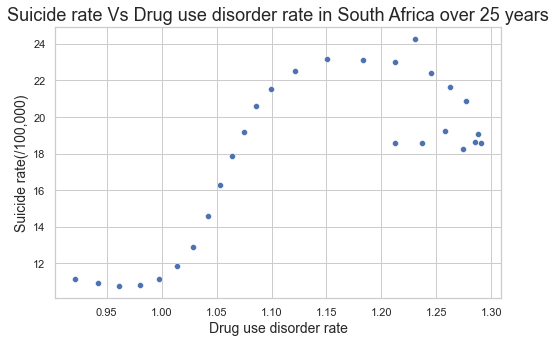

In [110]:
ax = sns.scatterplot(x='Drug use disorders (%)', y=suicide_rate, data=df_South_Africa)
plt.xlabel('Drug use disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Drug use disorder rate in South Africa over 25 years', size=18)

In [111]:
suicide_rates_South_Africa  = df_South_Africa[suicide_rate]
Drug_use_disorders_South_Africa =df_South_Africa['Drug use disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_South_Africa, Drug_use_disorders_South_Africa)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Drug use disorder rate in South Africa over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Drug use disorder rate in South Africa over the 25 years is 0.75
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Drug use disorder rate in Nigeria over 25 years')

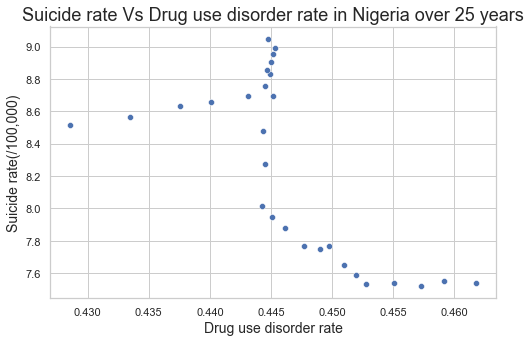

In [112]:
ax = sns.scatterplot(x='Drug use disorders (%)', y=suicide_rate, data=df_Nigeria)
plt.xlabel('Drug use disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Drug use disorder rate in Nigeria over 25 years', size=18)

In [113]:
suicide_rates_Nigeria  = df_Nigeria[suicide_rate]
Drug_use_disorders_Nigeria =df_Nigeria['Drug use disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_Nigeria, Drug_use_disorders_Nigeria)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Drug use disorder rate in Nigeria over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Drug use disorder rate in Nigeria over the 25 years is -0.67
It is  statistically significant.


#### In conclusion for Drug use disorder; we can reject the null hypothesis that there is no relationship between Suicide rate and drug use in the 3 countries(Nigeria,Ghana,South Africa) since there is evidence that there is a relationship between suicide rate and drug use disorders in these 3 countries,however for Egypt and Kenya we fail to reject the null hypothesis
**Countries that have an increase rate in drug use disorders associated with an increase in suicide rates in order of magnitude of correlation are:**
- Ghana
- South Africa

**While countries that have an increase rate in drug use disorders associated with a decrease in suicide rates in order of magnitude of correlation are :**
- Nigeria

Text(0.5, 1.0, 'Suicide rate Vs Alcohol use disorder rate in the five countries in Africa over 25 years')

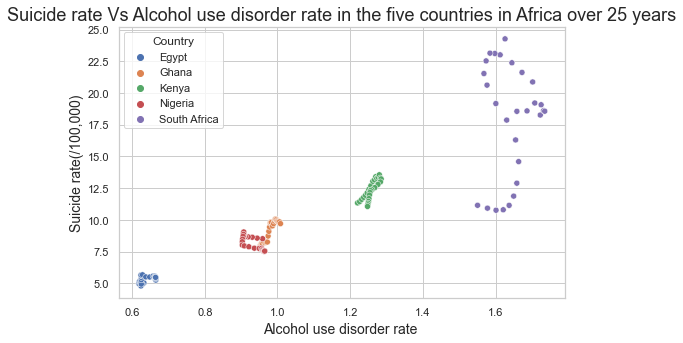

In [114]:
#Alcohol use disorders
ax = sns.scatterplot(x='Alcohol use disorders (%)', y=suicide_rate, data=df,hue=country)
plt.xlabel('Alcohol use disorder rate ' , size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Alcohol use disorder rate in the five countries in Africa over 25 years', size=18)

In [115]:
#Aggregate correlation of Alcohol use disorders across all the countries
suicide_rates  = df[suicide_rate]
Alcohol_use_disorders =df['Alcohol use disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates, Alcohol_use_disorders)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Alcohol use disorder rate in the five countries over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Alcohol use disorder rate in the five countries over the 25 years is 0.9
It is  statistically significant.


**Considering each country:**

Text(0.5, 1.0, 'Suicide rate Vs Alcohol use disorder rate in Ghana over 25 years')

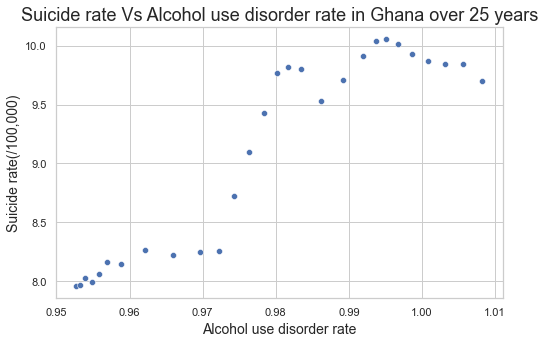

In [116]:
ax = sns.scatterplot(x='Alcohol use disorders (%)', y=suicide_rate, data=df_ghana)
plt.xlabel('Alcohol use disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Alcohol use disorder rate in Ghana over 25 years', size=18)

In [117]:
suicide_rates_ghana  = df_ghana[suicide_rate]
Alcohol_use_disorders_ghana =df_ghana['Alcohol use disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_ghana, Alcohol_use_disorders_ghana)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Alcohol use disorder rate in Ghana over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Alcohol use disorder rate in Ghana over the 25 years is 0.92
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Alcohol use disorder rate in Kenya over 25 years')

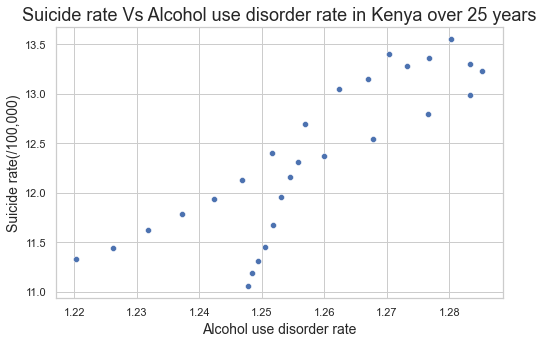

In [118]:
ax = sns.scatterplot(x='Alcohol use disorders (%)', y=suicide_rate, data=df_kenya)
plt.xlabel('Alcohol use disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Alcohol use disorder rate in Kenya over 25 years', size=18)

In [119]:
suicide_rates_kenya  = df_kenya[suicide_rate]
Alcohol_use_disorders_kenya =df_kenya['Alcohol use disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_kenya, Alcohol_use_disorders_kenya)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Alcohol use disorder rate in Kenya over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Alcohol use disorder rate in Kenya over the 25 years is 0.85
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Alcohol use disorder rate in Nigeria over 25 years')

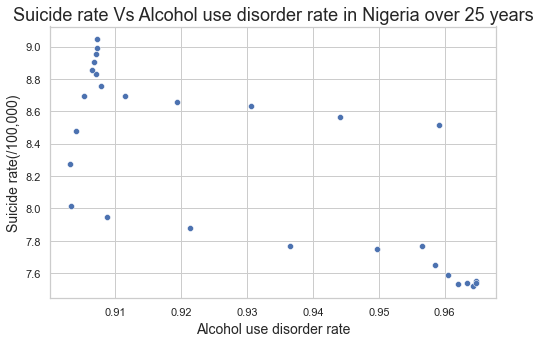

In [120]:
ax = sns.scatterplot(x='Alcohol use disorders (%)', y=suicide_rate, data=df_Nigeria)
plt.xlabel('Alcohol use disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Alcohol use disorder rate in Nigeria over 25 years', size=18)

In [121]:
suicide_rates_Nigeria  = df_Nigeria[suicide_rate]
Alcohol_use_disorders_Nigeria =df_Nigeria['Alcohol use disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_Nigeria, Alcohol_use_disorders_Nigeria)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Alcohol use disorder rate in Nigeria over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Alcohol use disorder rate in Nigeria over the 25 years is -0.77
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Alcohol use disorder rate in Egypt over 25 years')

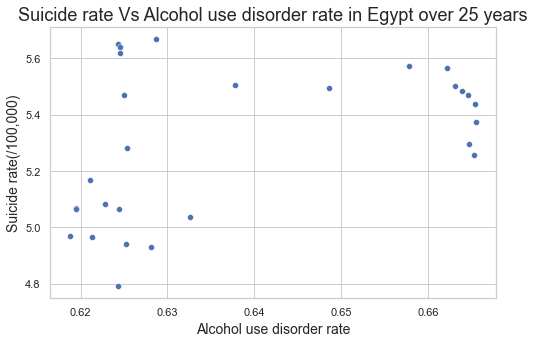

In [122]:
ax = sns.scatterplot(x='Alcohol use disorders (%)', y=suicide_rate, data=df_Egypt)
plt.xlabel('Alcohol use disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Alcohol use disorder rate in Egypt over 25 years', size=18)

In [123]:
suicide_rates_Egypt  = df_Egypt[suicide_rate]
Alcohol_use_disorders_Egypt =df_Egypt['Alcohol use disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_Egypt, Alcohol_use_disorders_Egypt)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Alcohol use disorder rate in Egypt over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Alcohol use disorder rate in Egypt over the 25 years is 0.44
It is  statistically significant.


Text(0.5, 1.0, 'Suicide rate Vs Alcohol use disorder rate in South Africa over 25 years')

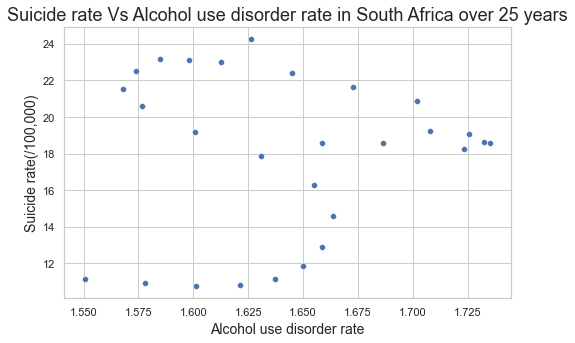

In [124]:
ax = sns.scatterplot(x='Alcohol use disorders (%)', y=suicide_rate, data=df_South_Africa)
plt.xlabel('Alcohol use disorder rate', size=14)
plt.ylabel('Suicide rate(/100,000)', size=14)
plt.title('Suicide rate Vs Alcohol use disorder rate in South Africa over 25 years', size=18)

In [125]:
suicide_rates_South_Africa  = df_South_Africa[suicide_rate]
Alcohol_use_disorders_South_Africa =df_South_Africa['Alcohol use disorders (%)']
pearsonr= scipy.stats.pearsonr(suicide_rates_South_Africa, Alcohol_use_disorders_South_Africa)
(correlation, pValue) = pearsonr
print('The correlation of Suicide rate to Alcohol use disorder rate in Egypt over the 25 years is', correlation.round(2))
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation of Suicide rate to Alcohol use disorder rate in Egypt over the 25 years is 0.06
It is not statistically significant.


#### In conclusion for Alcohol use disorder; we can reject the null hypothesis that there is no relationship between Suicide rate and alcohol use disorder in the 4 countries since there is evidence that there is a relationship between suicide rate and alcohol use disorders in these 4 countries,however for South Africa  we fail to reject the null hypothesis
**Countries that have an increase rate in alcohol use disorders associated with an increase in suicide rates in order of magnitude of correlation are:**
- Ghana
- Kenya

**While countries that have an increase rate in alcohol use disorders associated with a decrease in suicide rates in order of magnitude of correlation are :**
- Nigeria
- Egypt

### In conclusion :Research Question 3b
#### **Generally there is a relationship between Suicide rates and mental health disorders across all countries.**


### Qu 4: Can we conclude that depression rate(or mental health symptoms in the Lull survey) over the years differ by country or by gender?

#### We will be using  ANOVA test of mean values of depression accross the countries
#### For the Lull data we will be using chisquare test for an association between presence of symptoms of mental health disorder 

#### To determine if depression rate differ by country
- For the world data we will use ANOVA test of means to check the means of prevalence of depression across the 5 countries;
- For the Lull Survey we would use Chi-square test of association between present of symptoms of mental health disorder in the 5 countries


#### To determine if depression rate differ by country
- For the world data we will use T test of means to check the means of prevalence of depression males and females;
- For the Lull Survey we would use Chi-square test of association between present of symptoms of mental health disorder in both males and females

**First, we group the data into categories as the one-way ANOVA can't work with continuous variable -  we will create a new column for this newly assigned group our categoriesb e:
- Ghana
- Nigeria
- Egypt
- Kenya
- South Africa**(This has already been done earlier in Research Question 1b)

#### State the hypothesis for the Anova Test and Chi-square Test
**Anova Test for difference between means for the depression rate**

- 𝐻0:µ1=µ2=µ3  (the five population means are equal)
- 𝐻1:  At least one of the means differ
**T Test for difference between gender for the depression rate**
State the hypothesis

-   $H_0: µ_1 = µ_2$ ("there is no difference in evaluation scores between male and females")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in evaluation scores between male and females")

**Chi-square Test for difference between gender/amongst countries**
State the hypothesis:

- 𝐻0:  The prevalence of mental health symptoms is independent of gender/country
- 𝐻1:  The prevalence of mental health symptoms is associated with gender/country

In [126]:
#world data
mentalHealthDisorder =mental_health_data .groupby('Country').agg({depression_rate :['mean', 'std', 'var']}).reset_index()
mentalHealthDisorder.head()

Country  \
                  
0         Egypt   
1         Ghana   
2         Kenya   
3       Nigeria   
4  South Africa   

  Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)  \
                                                                                                       mean   
0                                           0.316549                                                          
1                                           0.036909                                                          
2                                           0.096581                                                          
3                                           0.708583                                                          
4                                           0.228058                                                          

                       
        std       var  
0  0.076006  0.005777  
1  0.026328  0.000693  
2  0.040389  0.001631  
3  0.193590  0.037477  
4  0.046160  0.002131

In [127]:
ghana_depression_rate = mental_health_data[mental_health_data['country_group'] == 'Ghana'][depression_rate]
nigeria_depression_rate =  mental_health_data[mental_health_data['country_group'] == 'Nigeria'][depression_rate]
egypt_depression_rate  = mental_health_data[mental_health_data['country_group'] == 'Egypt'][depression_rate]
kenya_depression_rate  = mental_health_data[mental_health_data['country_group'] == 'Kenya'][depression_rate]
south_africa_depression_rate =mental_health_data[mental_health_data['country_group'] == 'South Africa'][depression_rate]

In [128]:
f_statistic, p_value = scipy.stats.f_oneway(ghana_depression_rate, nigeria_depression_rate, egypt_depression_rate,kenya_depression_rate,south_africa_depression_rate)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 205.71799773511296, P-Value: 2.13810555437927e-56


#### Conclusion:
**Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.
From the Anova test carried out we can say that there is a statistical significant difference of depression rates over the 25-year period between countries**

In [129]:
#Lull Survey

country_symptom  = pd.crosstab(df_lull['symptoms_of_menta_health'], df_lull['Countries'])
country_symptom

Countries,Egypt,Ghana,Kenya,Nigeria,South Africa
symptoms_of_menta_health,,,,,
No,6,7,41,184,6
Yes,5,1,10,41,5


In [130]:
stat, p, dof, expected = chi2_contingency(country_symptom)
  
# interpret p-value,the stat is also displayed ,it can be uncommented 
alpha = 0.05
#print("chi-square value is " + str(stat))
print("p value is " + str(p))
if p <= alpha:
    print('There is a Dependent Association (reject the null hypothesis)')
else:
    print('Independent (Accept the null hypothesis)')


p value is 0.049062285144223665
There is a Dependent Association (reject the null hypothesis)


**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis. As there is sufficient evidence that symptoms of mental health disorder is dependent on participant's country.


In [131]:
#Prevalence rate of depression in both sexes
scipy.stats.levene(df['Prevalence of depression in males (%)'],
                   df['Prevalence in females (%)'], center ='mean')
# since the p-value is less than 0.05 we  assume unequality of variance

LeveneResult(statistic=10.262327467296169, pvalue=0.0015157310270170407)

Use the <code>ttest_ind</code> from the <code>scipy_stats</code> library

In [132]:
scipy.stats.ttest_ind(df['Prevalence of depression in males (%)'],
                   df['Prevalence in females (%)'], equal_var = False)

Ttest_indResult(statistic=-30.842600742636385, pvalue=3.5346031596960114e-86)

#### Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in depression rate based on gender

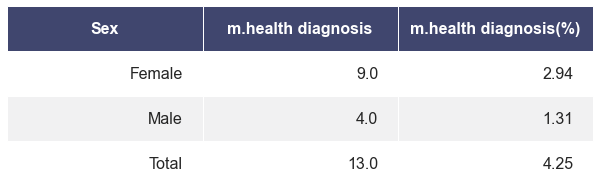

In [135]:
#Lull Survey,we have to get the table of prevalence of mental health symptoms before performing a chi-square test of association

prev_diagnosis_table = df_lull[df_lull.Ever_diagnosedwithamentalhealthcondition == 'Yes'].groupby('Sex').agg({'Ever_diagnosedwithamentalhealthcondition': 'count'}).reset_index()
prev_diagnosis_table['Prevalence_mental_health_diagnosis'] = 100 * prev_diagnosis_table.Ever_diagnosedwithamentalhealthcondition/df_lull.symptoms_of_menta_health.count()
prev_diagnosis_table= prev_diagnosis_table.rename(columns={'Prevalence_mental_health_diagnosis':'m.health diagnosis(%)'})
prev_diagnosis_table = prev_diagnosis_table.rename(columns={'Ever_diagnosedwithamentalhealthcondition':'m.health diagnosis'})
prev_diagnosis_table = prev_diagnosis_table.append(prev_diagnosis_table.sum(numeric_only=True), ignore_index=True)
prev_diagnosis_table['Sex'].fillna('Total', inplace=True)
#prev_diagnosis_tables.set_index('Sex', inplace=True)
#print(prev_diagnosis_tables)
def render_mpl_table(data, col_width=26.0, row_height=0.825, font_size=16,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax
#df.describe().round(2)

fig,ax = render_mpl_table(prev_diagnosis_table.round(2), header_columns=0, col_width=3.5)
prev_diagnosis_table
fig.savefig("table_diagnosis_totalisan.png")
#prev_symptoms_table_styled = prev_symptoms_table.style.background_gradient() #adding a gradient based on values in cell
#dfi.export(prev_symptoms_table_styled,"pic.png")


In [ ]:
prev_symptoms_table = df_lull[df_lull.symptoms_of_menta_health == 'Yes'].groupby('Sex').agg({'symptoms_of_menta_health': 'count'}).reset_index()
prev_symptoms_table

In [ ]:
prev_symptoms_table['Prevalence_of_m_health_symptoms'] = 100 * prev_symptoms_table.symptoms_of_menta_health/df_lull.symptoms_of_menta_health.count()
prev_symptoms_table = prev_symptoms_table.rename(columns={'Prevalence_of_m_health_symptoms':'m. health symptoms(%)'})
prev_symptoms_table = prev_symptoms_table.rename(columns={'symptoms_of_menta_health':'m. health symptoms'})
prev_symptoms_tables = prev_symptoms_table.append(prev_symptoms_table.sum(numeric_only=True), ignore_index=True)
prev_symptoms_tables['Sex'].fillna('Total', inplace=True)
def render_mpl_table(data, col_width=26.0, row_height=0.825, font_size=16,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax
#df.describe().round(2)

fig,ax = render_mpl_table(prev_symptoms_tables.round(2), header_columns=0, col_width=3.5)
fig.savefig("table_prevalence_total.png")
#prev_symptoms_table_styled = prev_symptoms_table.style.background_gradient() #adding a gradient based on values in cell
#dfi.export(prev_symptoms_table_styled,"pic.png")


In [ ]:
ztest ,pval1=stests.ztest(df_lull[df_lull['Sex'] == 'Female']['AggrSymptomMentalHealth'],
                   x2=df_lull[df_lull['Sex'] == 'Male']['AggrSymptomMentalHealth'],value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

#### Conclusion: Since the p-value is greater than alpha value 0.05, we reject the null hypothesis as there is no proof that there is a statistical difference in depression rate based on gender

In [ ]:
#level_acceptabilty
stats.levene(df_lull[df_lull['level_acceptabilty'] == 'High']['AggrSymptomMentalHealth'],
                   df_lull[df_lull['level_acceptabilty'] == 'low']['AggrSymptomMentalHealth'], center='mean')

In [ ]:
ztest ,pval1=stests.ztest(df_lull[df_lull['level_acceptabilty'] == 'High']['AggrSymptomMentalHealth'],
                   x2=df_lull[df_lull['level_acceptabilty'] == 'low']['AggrSymptomMentalHealth'],value=0)
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis. As there is sufficient evidence that symptoms of mental health disorder is dependent on participant's country.


### Conclusion:Research Question 4
- From the results of the analysis we can say that the prevalence of depression differ by country in both the world data and the Lull survey
- Whereas there is a difference between males and females prevalence of depression in the world data but not in our Lull Survey(This could be due to the disproportion of males and females who participated in the survey)

## Research Question 5.What is the attitude of individuals towards mental health in the 5 countries?

#### To determine the attitude of individuals towards mental health in the 5 countries?
Using the Lull Survey we would use Chi-square test of association between present of symptoms of mental health disorder and Individual's rating of mental health disorder

#### State the hypothesis for the Chi-square Test
- 𝐻0:  The prevalence of mental health symptoms is independent of rating of individual's of their mental health well being
- 𝐻1:  The prevalence of mental health symptoms is associated with individual's of their mental health well being

In [ ]:
new_lull = pd.DataFrame(df_lull.groupby('Rate_of_mentalwellbeing').mean()['AggrSymptomMentalHealth'].sort_values(ascending=False).reset_index())

sns.set(style="whitegrid")
ax = sns.barplot(x='Rate_of_mentalwellbeing',y='AggrSymptomMentalHealth',data=new_lull)
plt.xlabel("Rating of individuals' mental wellbeing", size=13)

plt.ylabel('Aggregate Symptoms of mental health disorder', size=13)
plt.title('Symptoms of mental health Disorder Vs Rating of mental health wellbeing by respondents', size=18)


In [ ]:
df_rating = pd.DataFrame(df_lull.groupby('Rate_of_mentalwellbeing').count()['AggrSymptomMentalHealth'].sort_values(ascending=False).reset_index())

In [ ]:
rate_symptoms= pd.crosstab(df_lull['Rate_of_mentalwellbeing'], df_lull['symptoms_of_menta_health'])
rate_symptoms

In [ ]:
stat, p, dof, expected = chi2_contingency(rate_symptoms)
  
# interpret p-value,the stat is also displayed ,it can be uncommented 
alpha = 0.05
#print("chi-square value is " + str(stat))
print("p value is " + str(p.round(3)))
if p <= alpha:
    print("There is a Dependent Association between rating of individual's and symptoms of mental health disorder(Positive Attitude)")
else:
    print("There is an Independent Association between rating of individual's and symptoms of mental health disorder(Negative Attitude)")

### Conclusion:Research Question 5
**From the results of the analysis we can conclude that the attitude of Individual's to their mental health is Positive,since we reject the null hypothesis as their is enough proof that individuals' rating of mental health is dependent on their symptoms of mental health disorder**

 ## Research Question 6:What is the level of acceptability to mental health care in the 5 countries?

In [ ]:
df_acceptability = pd.DataFrame(df_lull.groupby('level_acceptabilty').count()['AggrSymptomMentalHealth'].sort_values(ascending=False).reset_index())
df_acceptability

In [ ]:
df_acceptability['Percentage'] = 100 * df_acceptability.AggrSymptomMentalHealth/df_lull.AggrSymptomMentalHealth.count()
df_acceptability = df_acceptability.rename(columns={'level_acceptabilty':'level of Acceptability'})
df_acceptability = df_acceptability.rename(columns={'AggrSymptomMentalHealth':'Number'})
df_acceptabiliti = df_acceptability.append(df_acceptability.sum(numeric_only=True), ignore_index=True)
df_acceptabiliti['level of Acceptability'].fillna('Total', inplace=True)
def render_mpl_table(data, col_width=26.0, row_height=0.825, font_size=16,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax
#df.describe().round(2)

fig,ax = render_mpl_table(df_acceptabiliti.round(2), header_columns=0, col_width=3.5)
#fig.savefig("table_prevalence.png")
#prev_symptoms_table_styled = prev_symptoms_table.style.background_gradient() #adding a gradient based on values in cell
#dfi.export(prev_symptoms_table_styled,"pic.png")


In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(x='level of Acceptability',y='Number',data=df_acceptability)
plt.xlabel('level of Acceptability', size=14)
plt.ylabel('Number', size=14)
plt.title('Level of Acceptability of mental health care by a virtual platform', size=18)

### Conclusion Research Question 6:There is a high level of acceptablity of mental health care through an app

## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                     |
| ----------------- | ------- | --------------- | -------------------------------------- |
| 2021-10-04        | 0.1     | Okorie Oluchukwu C| Created the initial version of this notebook for the '20 clues Team' |


Copyright © 2021 '20 Clues Team'(Group 5),Women Techsters 2021. This notebook and its associated files and project can be found in [GitHub](https://github.com/Women-Techsters-Fellowship-2021/Group5-FinalProject-Team-20-Clues)